https://pvsravanth.medium.com/translate-locally-using-open-source-argostranslate-cb4fc5e450c8

In [ ]:
def install_translation_package(from_code : str = "en", to_code : str = None ) -> bool:
    """
    Attempts to install a translation package for Argos Translate, given a source
    and target language code, if it's not already cached as attempted. This function
    updates the package index, checks the available packages, and installs the required
    package if it has not been attempted previously.

    Parameters:
    - from_code (str): The ISO 639-1 language code of the source language. Defaults to 'en'.
    - to_code (str): The ISO 639-1 language code of the target language.

    Returns:
    - bool: True if the installation attempt was made (regardless of success), False otherwise.

    Utilizes an LRU (Least Recently Used) cache to remember installation attempts, preventing
    redundant installations for the same language pairs.
    """

    if not to_code:
        return False  # No target language code provided

    # Generate a unique identifier for the language pair
    package_id = f"{from_code}-{to_code}"

    # Update the Argos Translate package index
    argostranslate.package.update_package_index()

    # Get the list of available translation packages
    available_packages = argostranslate.package.get_available_packages()

    # Find the package that matches the specified from and to languages
    package_to_install = next(
        filter(
            lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
        ), None
    )

    # Attempt to install the package if found
    if package_to_install:
        print(f"Attempting to install package: {package_id}")
        argostranslate.package.install_from_path(package_to_install.download())
        return True
    else:
        print(f"No package found for translating from '{from_code}' to '{to_code}'.")
        return False  # Package not found or installation not attempted

In [ ]:
def translate_text(text: str, from_code: str = "en", to_code: str = "pt") -> str:
    """
    Translates the given text from the source language to the target language using
    Argos Translate, with caching to avoid retranslating the same text.

    Parameters:
    - text (str): The text to be translated.
    - from_code (str): The ISO 639-1 language code of the source language. Defaults to 'en'.
    - to_code (str): The ISO 639-1 language code of the target language. Defaults to 'pt'.

    Returns:
    - str: The translated text.

    Utilizes an LRU (Least Recently Used) cache to store the results of recent translations
    and quickly retrieve them for repeated requests, reducing the need for redundant translations.
    """

    # Load installed languages
    installed_languages = argostranslate.translate.get_installed_languages()

    # Select source and target languages
    from_lang = next((lang for lang in installed_languages if lang.code == from_code), None)
    to_lang = next((lang for lang in installed_languages if lang.code == to_code), None)

    if not from_lang or not to_lang:
        return "Language code not found or language not installed."

    # Get the translation model for the desired language pair
    translate = from_lang.get_translation(to_lang)

    # Translate text
    translated_text = translate.translate(text)

    return translated_text

In [ ]:
!pip install argostranslate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 38.0 MB/s eta 0:00:00


In [ ]:
import argostranslate.package
import argostranslate.translate

def install_languages():
    # تحديث فهرس الحزم المتاحة
    argostranslate.package.update_package_index()

    # البحث عن الحزم المتاحة لتحميلها
    available_packages = argostranslate.package.get_available_packages()

    # مثال: تحميل الترجمة من الإنجليزية (en) إلى العربية (ar)
    package_to_install = next(
        filter(
            lambda x: x.from_code == "en" and x.to_code == "ar", available_packages
        )
    )

    # تثبيت الحزمة
    if package_to_install:
        print(f"Downloading and installing: {package_to_install}...")
        argostranslate.package.install_from_path(package_to_install.download())
        print("Done!")

# شغل هذه الدالة مرة واحدة لتحميل اللغات
install_languages()

INFO:argostranslate.utils:('Looking for cached Spacy xx_sent_ud_sm.',)
INFO:argostranslate.utils:('Downloading Spacy xx_sent_ud_sm.',)


✔ Download and installation successful
You can now load the package via spacy.load('xx_sent_ud_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


INFO:argostranslate.utils:('Spacy xx_sent_ud_sm successfully cached.',)
INFO:argostranslate.utils:('Get https://argos-net.com/v1/translate-en_ar-1_0.argosmodel',)


INFO:argostranslate.utils:('Got https://argos-net.com/v1/translate-en_ar-1_0.argosmodel',)


Done!


In [ ]:
import argostranslate.translate

text_to_translate = "Warning: Low battery"
from_code = "en"
to_code = "ar"

# تنفيذ الترجمة
translated_text = argostranslate.translate.translate(text_to_translate, from_code, to_code)

print(translated_text)
# النتيجة المتوقعة: تحذير: البطارية منخفضة

INFO:argostranslate.utils:('get_installed_languages',)
INFO:argostranslate.utils:('paragraphs:', ['Warning: Low battery'])
INFO:argostranslate.utils:('apply_packaged_translation', 'Warning: Low battery')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.utils:('sentences', ['Warning: Low battery'])
INFO:argostranslate.utils:('tokenized', [['▁War', 'ning', ':', '▁Low', '▁battery']])
INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁تحذير', ':', '▁بط', 'ارية', '▁منخفضة']], scores=[-1.8430290222167969], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('تحذير: بطارية منخفضة', -1.8430290222167969)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('تحذير: بطارية منخفضة', -1.8430290222167969)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('تحذير: بطارية منخفضة', -1.8430290222167969)])


تحذير: بطارية منخفضة


In [ ]:
!pip install paddleocr

In [ ]:
!pip install langchain

In [ ]:
!python -m pip install "paddleocr[all]"

  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (68.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.8/450.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing 

In [ ]:
!pip install langchain
!pip install langchain-community

In [ ]:
import warnings
import os

# إخفاء تحذيرات بايثون العادية
warnings.filterwarnings("ignore")

# إخفاء تحذيرات النظام والمكتبات (مثل Paddle/Tensorflow)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

https://github.com/frotms/PaddleOCR2Pytorch/blob/main/doc/doc_en/installation_en.md

In [ ]:
shapely
numpy >= 1.24
pillow
pyclipper
opencv-python >== 4.1.0
#pytorch >= 1.13
paddlepaddle >= 2.0.0

In [ ]:
!pip install -r 1.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [ ]:
pip3 install --upgrade pip

# If you have cuda9 or cuda10 installed on your machine, please run the following command to install
python3 -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

# If you only have cpu on your machine, please run the following command to install
python3 -m pip install paddlepaddle==2.0.0 -i https://mirror.baidu.com/pypi/simple

In [ ]:
!python3 -m pip install paddlepaddle==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
ERROR: Could not find a version that satisfies the requirement paddlepaddle==2.0.0 (from versions: none)
ERROR: No matching distribution found for paddlepaddle==2.0.0


https://github.com/PaddlePaddle/PaddleOCR

In [ ]:
!pip install paddlepaddle

In [ ]:

import argostranslate.translate

from paddleocr import PaddleOCR

# 1. إعداد OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')
img_path = '/content/1.jpg'
result = ocr.ocr(img_path, cls=True)

# 2. استخراج النص وترجمته
for line in result:
    for word_info in line:
        english_text = word_info[1][0] # النص الأصلي

        # الترجمة باستخدام Argos
        arabic_text = argostranslate.translate.translate(english_text, "en", "ar")

        print(f"Original: {english_text}")
        print(f"Translated: {arabic_text}")
        print("-" * 20)

In [ ]:

import argostranslate.translate

from paddleocr import PaddleOCR

# 1. إعداد OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')
img_path = '/content/1.jpg'
result = ocr.ocr(img_path, cls=True)

# 2. استخراج النص وترجمته
for line in result:
    for word_info in line:
        english_text = word_info[1][0] # النص الأصلي

        # الترجمة باستخدام Argos
        arabic_text = argostranslate.translate.translate(english_text, "en", "ar")

        print(f"Original: {english_text}")
        print(f"Translated: {arabic_text}")
        print("-" * 20)

/tmp/ipython-input-2926352835.py:6: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_mo

TypeError: PaddleOCR.predict() got an unexpected keyword argument 'cls'

In [ ]:
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إعداد OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')
img_path = '/content/1.jpg'
result = ocr.ocr(img_path, cls=True)

# 2. استخراج النص وترجمته
for line in result:
    for word_info in line:
        english_text = word_info[1][0] # النص الأصلي

        # الترجمة باستخدام Argos
        arabic_text = argostranslate.translate.translate(english_text, "en", "ar")

        print(f"Original: {english_text}")
        print(f"Translated: {arabic_text}")
        print("-" * 20)

/tmp/ipython-input-521047917.py:5: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_mod

TypeError: PaddleOCR.predict() got an unexpected keyword argument 'cls'

In [ ]:
from paddleocr import PaddleOCR
import argostranslate.translate
import argostranslate.package

# 1. إعداد OCR (لاحظ التغيير هنا: استخدام المعاملات الجديدة)
# قمنا بتغيير use_angle_cls إلى use_textline_orientation
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

img_path = '/content/1.jpg'

# 2. تشغيل الموديل
# (قمنا بإزالة cls=True لأنها غير مدعومة بهذا الشكل في النسخة الجديدة، الموديل سيعمل تلقائياً بناء على التعريف أعلاه)
try:
    # النسخ الجديدة تفضل استخدام ocr.ocr() بدون معاملات إضافية إذا تم تعريفها في البداية
    result = ocr.ocr(img_path)

    # ملاحظة: في النسخ الجديدة جداً، قد يتغير شكل الناتج (Result format)
    # إذا ظهر لك خطأ هنا، تأكد أن result ليس فارغاً
    if not result or result[0] is None:
        print("لم يتم العثور على نص في الصورة.")
    else:
        # الكود الخاص بالترجمة
        # ملاحظة: قد تحتاج لتثبيت اللغات كما شرحنا سابقاً
        for line in result:
             # في بعض النسخ، الـ result يكون قائمة داخل قائمة، لذا قد نحتاج result[0]
             # سنستخدم حلقة تكرار عامة لتجنب الأخطاء
             if isinstance(line, list):
                for word_info in line:
                    text = word_info[1][0]
                    print(f"النص المستخرج: {text}")
                    # هنا تضع كود الترجمة
             else:
                 # التعامل مع الهيكلية الجديدة إذا كانت مختلفة
                 pass

except TypeError as e:
    # في حال استمر الخطأ، جرب استخدام الدالة predict مباشرة كما اقترح التحذير
    print("Trying alternative method...")
    result = ocr.predict(img_path)
    print(result)

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.
/tmp

In [ ]:
results = ocr.predict(img_path)

# الطباعة في النسخة الجديدة
for res in results:
    # غالباً النسخة الجديدة تعيد كائن (Object) يحتوي على بيانات
    print(res)

{'input_path': '/content/1.jpg', 'page_index': None, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'input_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'model_settings': {'use_doc_orientation_classify': True, 'use_doc_unwarping': True}, 'angle': 0, 'rot_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'output_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8)}, 'dt_polys': [array([[249, 140],
       ...,
       [248, 201]], dtype=int16), array([[177, 191],
       ...,
       [176, 241]], dtype=int16), array([[176, 238],
       ...,
       [175, 288]], dtype=int16), array([[174, 283],
       ...,
       [173, 337]], dtype=int16), ar

In [ ]:
results = ocr.predict(img_path)

# الطباعة في النسخة الجديدة
for res in results:
    # غالباً النسخة الجديدة تعيد كائن (Object) يحتوي على بيانات
    print(res)



{'input_path': '/content/1.jpg', 'page_index': None, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'input_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'model_settings': {'use_doc_orientation_classify': True, 'use_doc_unwarping': True}, 'angle': 0, 'rot_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8), 'output_img': array([[[255, ..., 255],
        ...,
        [255, ..., 255]],

       ...,

       [[255, ..., 255],
        ...,
        [255, ..., 255]]], dtype=uint8)}, 'dt_polys': [array([[249, 140],
       ...,
       [248, 201]], dtype=int16), array([[177, 191],
       ...,
       [176, 241]], dtype=int16), array([[176, 238],
       ...,
       [175, 288]], dtype=int16), array([[174, 283],
       ...,
       [173, 337]], dtype=int16), array([[175, 336],
       ...,
       [174, 385]], dtype=int16), array([[178, 388],
       ...,
       [177, 427]], dtype=int16), array([[250, 472],
       ...,
       [249, 515]], dtype=int16), array([[178, 518],
       ...,
       [177, 559]], dtype=int16), array([[175, 563],
       ...,
       [174, 610]], dtype=int16), array([[249, 652],
       ...,
       [248, 695]], dtype=int16), array([[179, 700],
       ...,
       [178, 741]], dtype=int16), array([[178, 746],
       ...,
       [177, 790]], dtype=int16), array([[248, 833],
       ...,
       [248, 884]], dtype=int16), array([[177, 883],
       ...,
       [177, 923]], dtype=int16), array([[ 249,  966],
       ...,
       [ 249, 1015]], dtype=int16), array([[ 174, 1016],
       ...,
       [ 174, 1059]], dtype=int16), array([[ 173, 1063],
       ...,
       [ 174, 1110]], dtype=int16), array([[ 171, 1107],
       ...,
       [ 172, 1155]], dtype=int16), array([[ 171, 1152],
       ...,
       [ 172, 1202]], dtype=int16), array([[ 174, 1203],
       ...,
       [ 175, 1244]], dtype=int16), array([[ 247, 1286],
       ...,
       [ 247, 1330]], dtype=int16), array([[ 171, 1332],
       ...,
       [ 171, 1373]], dtype=int16), array([[ 170, 1379],
       ...,
       [ 171, 1423]], dtype=int16), array([[ 170, 1427],
       ...,
       [ 170, 1468]], dtype=int16), array([[ 246, 1513],
       ...,
       [ 246, 1555]], dtype=int16), array([[ 169, 1561],
       ...,
       [ 170, 1605]], dtype=int16), array([[ 168, 1605],
       ...,
       [ 169, 1649]], dtype=int16), array([[ 167, 1650],
       ...,
       [ 168, 1694]], dtype=int16), array([[ 166, 1698],
       ...,
       [ 166, 1741]], dtype=int16), array([[ 244, 1785],
       ...,
       [ 244, 1825]], dtype=int16), array([[ 167, 1832],
       ...,
       [ 167, 1872]], dtype=int16), array([[ 168, 1877],
       ...,
       [ 169, 1918]], dtype=int16), array([[ 168, 1923],
       ...,
       [ 168, 1963]], dtype=int16), array([[ 169, 1970],
       ...,
       [ 169, 2007]], dtype=int16), array([[ 167, 2015],
       ...,
       [ 167, 2056]], dtype=int16)], 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': True}, 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_limit': 4000, 'box_thresh': 0.6, 'unclip_ratio': 1.5}, 'text_type': 'general', 'text_rec_score_thresh': 0.0, 'return_word_box': False, 'rec_texts': ['I did not sleep well, though my bed was comfortable enough, for I had all', 'sorts of queer dreams. There was a dog howling all night under my window,', 'which may have had something to do with it; or it may have been the paprika,', 'for I had to drink up all the water in my carafe, and was still thirsty. Towards', 'morning I slept and was wakened by the continuous knocking at my door, so I', 'guess I must have been sleeping soundly then.', 'I had for breakfast more paprika, and a sort of porridge of maize flour', 'which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very', 'excellent dish, which they call "impletata". (Mem., get recipe for this also.)', 'I had to hurry breakfast, for the train started a little before eight, or rather it', 'ought to have done so, for after rushing to the station at 7:30 I had to sit in the', 'carriage for more than an hour before we began to move.', 'It seems to me that the further east you go the more unpunctual are the', 'trains. What ought they to be in China?', 'All day long we seemed to dawdle through a country which was full of', 'beauty of every kind. Sometimes we saw little towns or castles on the top of', 'steep hills such as we see in old missals; sometimes we ran by rivers and', 'streams which seemed from the wide stony margin on each side of them to be', 'subject to great floods. It takes a lot of water, and running strong, to sweep the', 'outside edge of a river clear.', 'At every station there were groups of people, sometimes crowds, and in all', 'sorts of attire. Some of them were just like the peasants at home or those I saw', 'coming through France and Germany, with short jackets, and round hats, and', 'home-made trousers; but others were very picturesque.', 'The women looked pretty, except when you got near them, but they were', 'very clumsy about the waist. They had all full white sleeves of some kind or', 'other, and most of them had big belts with a lot of strips of something fluttering', 'from them like the dresses in a ballet, but of course there were petticoats under', 'them.', 'The strangest figures we saw were the Slovaks, who were more barbarian', 'than the rest, with their big cow-boy hats, great baggy dirty-white trousers,', 'white linen shirts, and enormous heavy leather belts, nearly a foot wide, all', 'studded over with brass nails. They wore high boots, with their trousers tucked', 'into them, and had long black hair and heavy black moustaches. They are very', 'picturesque, but do not look prepossessing. On the stage they would be set'], 'rec_scores': [0.9865754842758179, 0.9788674116134644, 0.9763415455818176, 0.9804574847221375, 0.986947238445282, 0.9799139499664307, 0.9650661945343018, 0.9850000143051147, 0.9871509075164795, 0.9832485914230347, 0.9683473110198975, 0.9833923578262329, 0.9787366390228271, 0.9579907655715942, 0.9827852845191956, 0.9844700694084167, 0.9906420707702637, 0.9929270148277283, 0.9862110018730164, 0.9787558913230896, 0.9701083302497864, 0.9646274447441101, 0.9647713899612427, 0.9934837222099304, 0.9738094806671143, 0.9647428393363953, 0.9793207049369812, 0.9881348013877869, 0.9999440908432007, 0.9878590106964111, 0.9721730351448059, 0.9755663275718689, 0.9929732084274292, 0.9718193411827087, 0.9848200082778931], 'rec_polys': [array([[249, 140],
       ...,
       [248, 201]], dtype=int16), array([[177, 191],
       ...,
       [176, 241]], dtype=int16), array([[176, 238],
       ...,
       [175, 288]], dtype=int16), array([[174, 283],
       ...,
       [173, 337]], dtype=int16), array([[175, 336],
       ...,
       [174, 385]], dtype=int16), array([[178, 388],
       ...,
       [177, 427]], dtype=int16), array([[250, 472],
       ...,
       [249, 515]], dtype=int16), array([[178, 518],
       ...,
       [177, 559]], dtype=int16), array([[175, 563],
       ...,
       [174, 610]], dtype=int16), array([[249, 652],
       ...,
       [248, 695]], dtype=int16), array([[179, 700],
       ...,
       [178, 741]], dtype=int16), array([[178, 746],
       ...,
       [177, 790]], dtype=int16), array([[248, 833],
       ...,
       [248, 884]], dtype=int16), array([[177, 883],
       ...,
       [177, 923]], dtype=int16), array([[ 249,  966],
       ...,
       [ 249, 1015]], dtype=int16), array([[ 174, 1016],
       ...,
       [ 174, 1059]], dtype=int16), array([[ 173, 1063],
       ...,
       [ 174, 1110]], dtype=int16), array([[ 171, 1107],
       ...,
       [ 172, 1155]], dtype=int16), array([[ 171, 1152],
       ...,
       [ 172, 1202]], dtype=int16), array([[ 174, 1203],
       ...,
       [ 175, 1244]], dtype=int16), array([[ 247, 1286],
       ...,
       [ 247, 1330]], dtype=int16), array([[ 171, 1332],
       ...,
       [ 171, 1373]], dtype=int16), array([[ 170, 1379],
       ...,
       [ 171, 1423]], dtype=int16), array([[ 170, 1427],
       ...,
       [ 170, 1468]], dtype=int16), array([[ 246, 1513],
       ...,
       [ 246, 1555]], dtype=int16), array([[ 169, 1561],
       ...,
       [ 170, 1605]], dtype=int16), array([[ 168, 1605],
       ...,
       [ 169, 1649]], dtype=int16), array([[ 167, 1650],
       ...,
       [ 168, 1694]], dtype=int16), array([[ 166, 1698],
       ...,
       [ 166, 1741]], dtype=int16), array([[ 244, 1785],
       ...,
       [ 244, 1825]], dtype=int16), array([[ 167, 1832],
       ...,
       [ 167, 1872]], dtype=int16), array([[ 168, 1877],
       ...,
       [ 169, 1918]], dtype=int16), array([[ 168, 1923],
       ...,
       [ 168, 1963]], dtype=int16), array([[ 169, 1970],
       ...,
       [ 169, 2007]], dtype=int16), array([[ 167, 2015],
       ...,
       [ 167, 2056]], dtype=int16)], 'vis_fonts': [<paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>, <paddlex.utils.fonts.Font object at 0x7cdbe91f2ae0>], 'textline_orientation_angles': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'rec_boxes': array([[ 248, ...,  211],
       ...,
       [ 167, ..., 2056]], dtype=int16)}

In [7]:
import argostranslate.translate

# دالة ترجمة بسيطة (تأكد أنك قمت بتثبيت اللغات سابقاً)
def translate_text(text):
    try:
        return argostranslate.translate.translate(text, "en", "ar")
    except Exception as e:
        return f"Error: {e}"

# 1. تشغيل التوقع (كما فعلت أنت)
results = ocr.predict(img_path)

# 2. استخراج النص والترجمة
# الموديل الجديد يعيد قائمة نتائج (واحدة لكل صورة)، لذا نمر عليها بحلقة تكرار
for res in results:
    # التحقق من وجود نصوص داخل النتيجة
    if 'rec_texts' in res:
        text_list = res['rec_texts'] # هذه هي القائمة التي تحتوي على النصوص

        print(f"تم العثور على {len(text_list)} سطر:\n")

        for text in text_list:
            # النص الأصلي
            print(f"EN: {text}")

            # الترجمة
            translated = translate_text(text)
            print(f"AR: {translated}")
            print("-" * 30)

    else:
        print("لم يتم العثور على نصوص في هذه الصورة.")

INFO:argostranslate.utils:('paragraphs:', ['I did not sleep well, though my bed was comfortable enough, for I had all'])
INFO:argostranslate.utils:('apply_packaged_translation', 'I did not sleep well, though my bed was comfortable enough, for I had all')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.utils:('sentences', ['I did not sleep well, though my bed was comfortable enough, for I had all'])
INFO:argostranslate.utils:('tokenized', [['▁I', '▁did', '▁not', '▁sleep', '▁well', ',', '▁though', '▁my', '▁bed', '▁was', '▁comfortable', '▁enough', ',', '▁for', '▁I', '▁had', '▁all']])


تم العثور على 35 سطر:

EN: I did not sleep well, though my bed was comfortable enough, for I had all


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁لم', '▁أن', 'م', '▁جيدا', 'ً', '▁على', '▁الرغم', '▁من', '▁أن', '▁سرير', 'ي', '▁كان', '▁مريح', 'ا', 'ً', '▁بما', '▁فيه', '▁الكفاية']], scores=[-6.881343364715576], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('لم أنم جيداً على الرغم من أن سريري كان مريحاً بما فيه الكفاية', -6.881343364715576)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('لم أنم جيداً على الرغم من أن سريري كان مريحاً بما فيه الكفاية', -6.881343364715576)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('لم أنم جيداً على الرغم من أن سريري كان مريحاً بما فيه الكفاية', -6.881343364715576)])
INFO:argostranslate.utils:('paragraphs:', ['sorts of queer dreams. There was a dog howling all night under my window,'])
INFO:argostranslate.utils:('apply_packaged_translation', 'sorts of queer dreams. There was a dog howling all night under my window,')
INFO:argostranslate.utils:('Splitting sentences us

AR: لم أنم جيداً على الرغم من أن سريري كان مريحاً بما فيه الكفاية
------------------------------
EN: sorts of queer dreams. There was a dog howling all night under my window,
AR: نوع من الأحلام الغريبة كان هناك كلب يتجول طوال الليل تحت نافذتي
------------------------------
EN: which may have had something to do with it; or it may have been the paprika,


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁الذي', '▁قد', '▁يكون', '▁له', '▁علاقة', '▁به', '▁أو', '▁ربما', '▁يكون', '▁هو', '▁الب', 'بري', 'كا']], scores=[-9.122547149658203], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('الذي قد يكون له علاقة به أو ربما يكون هو الببريكا', -9.122547149658203)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('الذي قد يكون له علاقة به أو ربما يكون هو الببريكا', -9.122547149658203)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('الذي قد يكون له علاقة به أو ربما يكون هو الببريكا', -9.122547149658203)])
INFO:argostranslate.utils:('paragraphs:', ['for I had to drink up all the water in my carafe, and was still thirsty. Towards'])
INFO:argostranslate.utils:('apply_packaged_translation', 'for I had to drink up all the water in my carafe, and was still thirsty. Towards')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostra

AR: الذي قد يكون له علاقة به أو ربما يكون هو الببريكا
------------------------------
EN: for I had to drink up all the water in my carafe, and was still thirsty. Towards


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁لأنني', '▁شرب', 'ت', '▁كل', '▁الماء', '▁في', '▁ق', 'افل', 'تي', '▁و', 'ظل', '▁', 'عط', 'شا', 'ً']], scores=[-7.7109856605529785], attention=[], logits=[]), TranslationResult(hypotheses=[['▁نحو']], scores=[-1.4264553785324097], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('لأنني شربت كل الماء في قافلتي وظل عطشاً نحو', -9.137441039085388)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('لأنني شربت كل الماء في قافلتي وظل عطشاً نحو', -9.137441039085388)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('لأنني شربت كل الماء في قافلتي وظل عطشاً نحو', -9.137441039085388)])
INFO:argostranslate.utils:('paragraphs:', ['morning I slept and was wakened by the continuous knocking at my door, so I'])
INFO:argostranslate.utils:('apply_packaged_translation', 'morning I slept and was wakened by the continuous knocking at my door, so I')
INFO:argostranslate.utils:('Splittin

AR: لأنني شربت كل الماء في قافلتي وظل عطشاً نحو
------------------------------
EN: morning I slept and was wakened by the continuous knocking at my door, so I
AR: في الصباح نمت و استيقظت من طرق الباب
------------------------------
EN: guess I must have been sleeping soundly then.


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁أعتقد', '▁أنني', '▁كنت', '▁نائم', 'ا', 'ً', '▁جيدا', 'ً', '▁حينها']], scores=[-6.146543502807617], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('أعتقد أنني كنت نائماً جيداً حينها', -6.146543502807617)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('أعتقد أنني كنت نائماً جيداً حينها', -6.146543502807617)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('أعتقد أنني كنت نائماً جيداً حينها', -6.146543502807617)])
INFO:argostranslate.utils:('paragraphs:', ['I had for breakfast more paprika, and a sort of porridge of maize flour'])
INFO:argostranslate.utils:('apply_packaged_translation', 'I had for breakfast more paprika, and a sort of porridge of maize flour')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.utils:('sentences', ['I had for breakfast more paprika, and a sort of porridge of maize flo

AR: أعتقد أنني كنت نائماً جيداً حينها
------------------------------
EN: I had for breakfast more paprika, and a sort of porridge of maize flour


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁تناولت', '▁ف', 'طور', 'ا', 'ً', '▁أكثر', '▁من', '▁"', 'الب', 'بري', 'كا', '"', '▁و', '▁نوع', '▁من', '▁الع', 'صيد', 'ة']], scores=[-11.289499282836914], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة', -11.289499282836914)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة', -11.289499282836914)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة', -11.289499282836914)])
INFO:argostranslate.utils:('paragraphs:', ['which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very'])
INFO:argostranslate.utils:('apply_packaged_translation', 'which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer'

AR: تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة
------------------------------
EN: which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁و', '▁التي', '▁قالوا', '▁أنها', '▁كانت', '▁"', 'ما', 'مال', 'يغا', 'لا', '"', '▁و', 'زرع', 'ة', '▁بي', 'ض', '▁مح', 'شو', 'ة', '▁بال', 'غاز']], scores=[-16.04030418395996], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('و التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بالغاز', -16.04030418395996)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('و التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بالغاز', -16.04030418395996)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('و التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بالغاز', -16.04030418395996)])
INFO:argostranslate.utils:('paragraphs:', ['excellent dish, which they call "impletata". (Mem., get recipe for this also.)'])
INFO:argostranslate.utils:('apply_packaged_translation', 'excellent dish, which they call "impletata". (Mem., get recipe for this also.)')
INFO:argostranslate.utils:('Splitting se

AR: و التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بالغاز
------------------------------
EN: excellent dish, which they call "impletata". (Mem., get recipe for this also.)


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁طبق', '▁ممتاز', '▁يطلق', 'ون', '▁عليه', '▁"', 'م', 'بت', 'لات', 'ا', '"']], scores=[-7.567909240722656], attention=[], logits=[]), TranslationResult(hypotheses=[['▁(', 'M', 'em', '.', ',', '▁get', '▁re', 'cip', 'e', '▁for', '▁this', '▁also', '.', ')']], scores=[-2.9002981185913086], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('طبق ممتاز يطلقون عليه "مبتلاتا" (Mem., get recipe for this also.)', -10.468207359313965)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('طبق ممتاز يطلقون عليه "مبتلاتا" (Mem., get recipe for this also.)', -10.468207359313965)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('طبق ممتاز يطلقون عليه "مبتلاتا" (Mem., get recipe for this also.)', -10.468207359313965)])
INFO:argostranslate.utils:('paragraphs:', ['I had to hurry breakfast, for the train started a little before eight, or rather it'])
INFO:argostranslate.utils:('apply_pack

AR: طبق ممتاز يطلقون عليه "مبتلاتا" (Mem., get recipe for this also.)
------------------------------
EN: I had to hurry breakfast, for the train started a little before eight, or rather it


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁كان', '▁علي', 'ّ', '▁أن', '▁أسرع', '▁في', '▁الإ', 'ف', 'طار', '▁لأن', '▁القطار', '▁بدأ', '▁قبل', '▁الثامنة', '▁بقليل', '▁أو', '▁بالأحرى']], scores=[-9.10049057006836], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('كان عليّ أن أسرع في الإفطار لأن القطار بدأ قبل الثامنة بقليل أو بالأحرى', -9.10049057006836)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('كان عليّ أن أسرع في الإفطار لأن القطار بدأ قبل الثامنة بقليل أو بالأحرى', -9.10049057006836)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('كان عليّ أن أسرع في الإفطار لأن القطار بدأ قبل الثامنة بقليل أو بالأحرى', -9.10049057006836)])
INFO:argostranslate.utils:('paragraphs:', ['ought to have done so, for after rushing to the station at 7:30 I had to sit in the'])
INFO:argostranslate.utils:('apply_packaged_translation', 'ought to have done so, for after rushing to the station at 7:30 I had to sit in the'

AR: كان عليّ أن أسرع في الإفطار لأن القطار بدأ قبل الثامنة بقليل أو بالأحرى
------------------------------
EN: ought to have done so, for after rushing to the station at 7:30 I had to sit in the


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁كان', '▁يجب', '▁أن', '▁أفعل', '▁ذلك', '▁بعد', '▁أن', '▁أسرع', '▁إلى', '▁المحطة', '▁في', '▁السابعة', '▁وال', 'نصف', '▁كان', '▁علي', '▁أن', '▁أجل', 'س', '▁في']], scores=[-10.013151168823242], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('كان يجب أن أفعل ذلك بعد أن أسرع إلى المحطة في السابعة والنصف كان علي أن أجلس في', -10.013151168823242)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('كان يجب أن أفعل ذلك بعد أن أسرع إلى المحطة في السابعة والنصف كان علي أن أجلس في', -10.013151168823242)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('كان يجب أن أفعل ذلك بعد أن أسرع إلى المحطة في السابعة والنصف كان علي أن أجلس في', -10.013151168823242)])
INFO:argostranslate.utils:('paragraphs:', ['carriage for more than an hour before we began to move.'])
INFO:argostranslate.utils:('apply_packaged_translation', 'carriage for more than an hour before we began to move.')
IN

AR: كان يجب أن أفعل ذلك بعد أن أسرع إلى المحطة في السابعة والنصف كان علي أن أجلس في
------------------------------
EN: carriage for more than an hour before we began to move.
AR: النقل لأكثر من ساعة قبل أن نبدأ بالتحرك
------------------------------
EN: It seems to me that the further east you go the more unpunctual are the


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁ي', 'َ', 'ب', 'ْ', 'دو', '▁لي', '▁بأن', 'ّ', '▁الشرق', 'َ', '▁الآخر', 'َ', '▁أنت', '▁ت', 'َ', 'ذ', 'ْ', 'هب', 'ُ', '▁الأكثر', '▁غير', '▁دقيق', 'ِ']], scores=[-10.31806468963623], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('يَبْدو لي بأنّ الشرقَ الآخرَ أنت تَذْهبُ الأكثر غير دقيقِ', -10.31806468963623)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('يَبْدو لي بأنّ الشرقَ الآخرَ أنت تَذْهبُ الأكثر غير دقيقِ', -10.31806468963623)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('يَبْدو لي بأنّ الشرقَ الآخرَ أنت تَذْهبُ الأكثر غير دقيقِ', -10.31806468963623)])
INFO:argostranslate.utils:('paragraphs:', ['trains. What ought they to be in China?'])
INFO:argostranslate.utils:('apply_packaged_translation', 'trains. What ought they to be in China?')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.uti

AR: يَبْدو لي بأنّ الشرقَ الآخرَ أنت تَذْهبُ الأكثر غير دقيقِ
------------------------------
EN: trains. What ought they to be in China?
AR: القطارات ماذا يجب أن يكونوا في الصين؟
------------------------------
EN: All day long we seemed to dawdle through a country which was full of


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁طوال', '▁اليوم', '▁بدا', '▁أننا', '▁ن', 'مر', '▁عبر', '▁بلد', '▁مليء']], scores=[-9.405694007873535], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('طوال اليوم بدا أننا نمر عبر بلد مليء', -9.405694007873535)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('طوال اليوم بدا أننا نمر عبر بلد مليء', -9.405694007873535)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('طوال اليوم بدا أننا نمر عبر بلد مليء', -9.405694007873535)])
INFO:argostranslate.utils:('paragraphs:', ['beauty of every kind. Sometimes we saw little towns or castles on the top of'])
INFO:argostranslate.utils:('apply_packaged_translation', 'beauty of every kind. Sometimes we saw little towns or castles on the top of')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.utils:('sentences', ['beauty of every kind.', 'Sometimes we saw littl

AR: طوال اليوم بدا أننا نمر عبر بلد مليء
------------------------------
EN: beauty of every kind. Sometimes we saw little towns or castles on the top of
AR: الجمال من كل نوع أحياناً رأينا مدن أو قلعة صغيرة على قمة
------------------------------
EN: steep hills such as we see in old missals; sometimes we ran by rivers and


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁ت', 'لال', '▁حاد', 'ة', '▁مثل', '▁ما', '▁ن', 'راه', '▁في', '▁الخ', 'نا', 'زير', '▁القديمة', '؛', '▁وأحيانا', 'ً', '▁ن', 'ركض', '▁عبر', '▁الأ', 'نهار']], scores=[-12.825652122497559], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('تلال حادة مثل ما نراه في الخنازير القديمة؛ وأحياناً نركض عبر الأنهار', -12.825652122497559)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('تلال حادة مثل ما نراه في الخنازير القديمة؛ وأحياناً نركض عبر الأنهار', -12.825652122497559)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('تلال حادة مثل ما نراه في الخنازير القديمة؛ وأحياناً نركض عبر الأنهار', -12.825652122497559)])
INFO:argostranslate.utils:('paragraphs:', ['streams which seemed from the wide stony margin on each side of them to be'])
INFO:argostranslate.utils:('apply_packaged_translation', 'streams which seemed from the wide stony margin on each side of them to be')
INFO

AR: تلال حادة مثل ما نراه في الخنازير القديمة؛ وأحياناً نركض عبر الأنهار
------------------------------
EN: streams which seemed from the wide stony margin on each side of them to be
AR: التدفق الذي بدا من الهامش المائي الواسع على كل جانب
------------------------------
EN: subject to great floods. It takes a lot of water, and running strong, to sweep the


INFO:argostranslate.utils:('tokenized', [['▁subject', '▁to', '▁great', '▁flood', 's', '.'], ['▁It', '▁takes', '▁a', '▁lot', '▁of', '▁water', ',', '▁and', '▁running', '▁strong', ',', '▁to', '▁sweep', '▁the']])
INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁تحت', '▁', 'فيضان', '▁كبير']], scores=[-6.080819606781006], attention=[], logits=[]), TranslationResult(hypotheses=[['▁ي', 'تطل', 'ّ', 'ب', '▁الكثير', '▁من', '▁الماء', '،', '▁وي', 'ركض', '▁بقوة', '،', '▁ل', 'مسح']], scores=[-8.720882415771484], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('تحت فيضان كبير يتطلّب الكثير من الماء، ويركض بقوة، لمسح', -14.80170202255249)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('تحت فيضان كبير يتطلّب الكثير من الماء، ويركض بقوة، لمسح', -14.80170202255249)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('تحت فيضان كبير يتطلّب الكثير من الماء، ويركض بقوة، لمسح', -14.80170202255249)])
INFO:argostranslate.utils:('para

AR: تحت فيضان كبير يتطلّب الكثير من الماء، ويركض بقوة، لمسح
------------------------------
EN: outside edge of a river clear.
AR: خارج حافة النهر
------------------------------
EN: At every station there were groups of people, sometimes crowds, and in all


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁في', '▁كل', '▁محطة', '▁كان', '▁هناك', '▁مجموعات', '▁من', '▁الناس', '،', '▁وأحيانا', '▁الح', 'شو', 'د', '،', '▁وفي', '▁كل', '▁شيء']], scores=[-7.1509222984313965], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي كل شيء', -7.1509222984313965)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي كل شيء', -7.1509222984313965)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي كل شيء', -7.1509222984313965)])
INFO:argostranslate.utils:('paragraphs:', ['sorts of attire. Some of them were just like the peasants at home or those I saw'])
INFO:argostranslate.utils:('apply_packaged_translation', 'sorts of attire. Some of them were just like the peasants at home or those I saw')
INFO:argostranslate.util

AR: في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي كل شيء
------------------------------
EN: sorts of attire. Some of them were just like the peasants at home or those I saw


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁نوع', '▁من', '▁الملابس', '▁الداخلية']], scores=[-3.1295716762542725], attention=[], logits=[]), TranslationResult(hypotheses=[['▁بعضهم', '▁كانوا', '▁مثل', '▁الف', 'لاح', 'ين', '▁في', '▁المنزل', '▁أو', '▁أولئك', '▁الذين', '▁رأيت', 'هم']], scores=[-4.66025972366333], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('نوع من الملابس الداخلية بعضهم كانوا مثل الفلاحين في المنزل أو أولئك الذين رأيتهم', -7.7898313999176025)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('نوع من الملابس الداخلية بعضهم كانوا مثل الفلاحين في المنزل أو أولئك الذين رأيتهم', -7.7898313999176025)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('نوع من الملابس الداخلية بعضهم كانوا مثل الفلاحين في المنزل أو أولئك الذين رأيتهم', -7.7898313999176025)])
INFO:argostranslate.utils:('paragraphs:', ['coming through France and Germany, with short jackets, and round hats, and'])
INFO:argostranslate.

AR: نوع من الملابس الداخلية بعضهم كانوا مثل الفلاحين في المنزل أو أولئك الذين رأيتهم
------------------------------
EN: coming through France and Germany, with short jackets, and round hats, and
AR: تأتي من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة،
------------------------------
EN: home-made trousers; but others were very picturesque.


INFO:argostranslate.utils:('sentences', ['home-made trousers; but others were very picturesque.'])
INFO:argostranslate.utils:('tokenized', [['▁home', '-', 'made', '▁tro', 'user', 's', ';', '▁but', '▁others', '▁were', '▁very', '▁pictures', 'que', '.']])
INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁سرا', 'ويل', '▁منزل', 'ية', '▁ال', 'صنع', '؛', '▁ولكن', '▁أخرى', '▁كانت', '▁صور', 'ية', '▁جدا', '.']], scores=[-9.039900779724121], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('سراويل منزلية الصنع؛ ولكن أخرى كانت صورية جدا.', -9.039900779724121)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('سراويل منزلية الصنع؛ ولكن أخرى كانت صورية جدا.', -9.039900779724121)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('سراويل منزلية الصنع؛ ولكن أخرى كانت صورية جدا.', -9.039900779724121)])
INFO:argostranslate.utils:('paragraphs:', ['The women looked pretty, except when you got near them, but they were'])
INFO:argost

AR: سراويل منزلية الصنع؛ ولكن أخرى كانت صورية جدا.
------------------------------
EN: The women looked pretty, except when you got near them, but they were
AR: النسوة بدت جميلة إلا عندما اقتربت منهم
------------------------------
EN: very clumsy about the waist. They had all full white sleeves of some kind or


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁خ', 'بيث', '▁جدا', 'ً', '▁حول', '▁الخ', 'صر', 'ِ', '.']], scores=[-4.993096351623535], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كان', '▁لديهم', '▁كل', '▁الأ', 'كما', 'م', '▁البيضاء', '▁من', '▁نوع', '▁ما', '▁أو']], scores=[-5.202746391296387], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('خبيث جداً حول الخصرِ. كان لديهم كل الأكمام البيضاء من نوع ما أو', -10.195842742919922)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('خبيث جداً حول الخصرِ. كان لديهم كل الأكمام البيضاء من نوع ما أو', -10.195842742919922)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('خبيث جداً حول الخصرِ. كان لديهم كل الأكمام البيضاء من نوع ما أو', -10.195842742919922)])
INFO:argostranslate.utils:('paragraphs:', ['other, and most of them had big belts with a lot of strips of something fluttering'])
INFO:argostranslate.utils:('apply_packaged_translation', 'other, and

AR: خبيث جداً حول الخصرِ. كان لديهم كل الأكمام البيضاء من نوع ما أو
------------------------------
EN: other, and most of them had big belts with a lot of strips of something fluttering


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁آخر', '،', '▁ومعظم', 'هم', '▁كان', '▁لديه', '▁أ', 'حزم', 'ة', '▁كبيرة', '▁مع', '▁الكثير', '▁من', '▁الش', 'رائ', 'ط', '▁من', '▁شيء', '▁مت', 'قلب']], scores=[-10.735102653503418], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متقلب', -10.735102653503418)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متقلب', -10.735102653503418)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متقلب', -10.735102653503418)])
INFO:argostranslate.utils:('paragraphs:', ['from them like the dresses in a ballet, but of course there were petticoats under'])
INFO:argostranslate.utils:('apply_packaged_translation', 'from them like the dresses in a ballet, but of course there were petticoats under'

AR: آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متقلب
------------------------------
EN: from them like the dresses in a ballet, but of course there were petticoats under


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁منهم', '▁مثل', '▁الف', 'سات', 'ين', '▁في', '▁ال', 'بالي', 'ه', '▁لكن', '▁بالطبع', '▁كان', '▁هناك', '▁ب', 'طاط', 'س', '▁تحت']], scores=[-9.422449111938477], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('منهم مثل الفساتين في الباليه لكن بالطبع كان هناك بطاطس تحت', -9.422449111938477)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('منهم مثل الفساتين في الباليه لكن بالطبع كان هناك بطاطس تحت', -9.422449111938477)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('منهم مثل الفساتين في الباليه لكن بالطبع كان هناك بطاطس تحت', -9.422449111938477)])
INFO:argostranslate.utils:('paragraphs:', ['them.'])
INFO:argostranslate.utils:('apply_packaged_translation', 'them.')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.utils:('sentences', ['them.'])
INFO:argostranslate.utils:('tokenized', [['▁them', '.']])
IN

AR: منهم مثل الفساتين في الباليه لكن بالطبع كان هناك بطاطس تحت
------------------------------
EN: them.
AR: هم
------------------------------
EN: The strangest figures we saw were the Slovaks, who were more barbarian


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁أ', 'غرب', '▁الأرقام', '▁التي', '▁رأينا', 'ها', '▁كانت', '▁السل', 'وفا', 'ك', 'يين', '▁الذين', '▁كانوا', '▁بر', 'بري', 'ين', '▁أكثر']], scores=[-6.934598922729492], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('أغرب الأرقام التي رأيناها كانت السلوفاكيين الذين كانوا بربريين أكثر', -6.934598922729492)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('أغرب الأرقام التي رأيناها كانت السلوفاكيين الذين كانوا بربريين أكثر', -6.934598922729492)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('أغرب الأرقام التي رأيناها كانت السلوفاكيين الذين كانوا بربريين أكثر', -6.934598922729492)])
INFO:argostranslate.utils:('paragraphs:', ['than the rest, with their big cow-boy hats, great baggy dirty-white trousers,'])
INFO:argostranslate.utils:('apply_packaged_translation', 'than the rest, with their big cow-boy hats, great baggy dirty-white trousers,')
INFO:argostranslate.ut

AR: أغرب الأرقام التي رأيناها كانت السلوفاكيين الذين كانوا بربريين أكثر
------------------------------
EN: than the rest, with their big cow-boy hats, great baggy dirty-white trousers,


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁من', '▁البقية', '،', '▁مع', '▁قب', 'عات', '▁ر', 'عا', 'ة', '▁البقر', '▁الكبيرة', '،', '▁السر', 'ا', 'ويل', '▁المت', 'سخ', 'ة', '▁جدا', '،']], scores=[-11.461483001708984], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('من البقية، مع قبعات رعاة البقر الكبيرة، السراويل المتسخة جدا،', -11.461483001708984)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('من البقية، مع قبعات رعاة البقر الكبيرة، السراويل المتسخة جدا،', -11.461483001708984)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('من البقية، مع قبعات رعاة البقر الكبيرة، السراويل المتسخة جدا،', -11.461483001708984)])
INFO:argostranslate.utils:('paragraphs:', ['white linen shirts, and enormous heavy leather belts, nearly a foot wide, all'])
INFO:argostranslate.utils:('apply_packaged_translation', 'white linen shirts, and enormous heavy leather belts, nearly a foot wide, all')
INFO:argostranslate.utils:('Sp

AR: من البقية، مع قبعات رعاة البقر الكبيرة، السراويل المتسخة جدا،
------------------------------
EN: white linen shirts, and enormous heavy leather belts, nearly a foot wide, all


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁قم', 'ص', 'ان', '▁بيضاء', '،', '▁وأ', 'حزم', 'ة', '▁جلد', 'ية', '▁ثقيل', 'ة', '،', '▁على', '▁طول', '▁قدم', '▁تقريبا', '،']], scores=[-7.623660087585449], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('قمصان بيضاء، وأحزمة جلدية ثقيلة، على طول قدم تقريبا،', -7.623660087585449)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('قمصان بيضاء، وأحزمة جلدية ثقيلة، على طول قدم تقريبا،', -7.623660087585449)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('قمصان بيضاء، وأحزمة جلدية ثقيلة، على طول قدم تقريبا،', -7.623660087585449)])
INFO:argostranslate.utils:('paragraphs:', ['studded over with brass nails. They wore high boots, with their trousers tucked'])
INFO:argostranslate.utils:('apply_packaged_translation', 'studded over with brass nails. They wore high boots, with their trousers tucked')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) Stan

AR: قمصان بيضاء، وأحزمة جلدية ثقيلة، على طول قدم تقريبا،
------------------------------
EN: studded over with brass nails. They wore high boots, with their trousers tucked


INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁', 'سحق', 'ت', '▁بأ', 'ظ', 'ا', 'فر', '▁ال', 'صدر']], scores=[-7.192917346954346], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كانوا', '▁ي', 'رت', 'دون', '▁حذاء', '▁عالي', 'ا', 'ً', '▁مع', '▁سروال', 'هم']], scores=[-7.7349853515625], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('سحقت بأظافر الصدر كانوا يرتدون حذاء عالياً مع سروالهم', -14.927902698516846)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('سحقت بأظافر الصدر كانوا يرتدون حذاء عالياً مع سروالهم', -14.927902698516846)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('سحقت بأظافر الصدر كانوا يرتدون حذاء عالياً مع سروالهم', -14.927902698516846)])
INFO:argostranslate.utils:('paragraphs:', ['into them, and had long black hair and heavy black moustaches. They are very'])
INFO:argostranslate.utils:('apply_packaged_translation', 'into them, and had long black hair and heavy black moustac

AR: سحقت بأظافر الصدر كانوا يرتدون حذاء عالياً مع سروالهم
------------------------------
EN: into them, and had long black hair and heavy black moustaches. They are very
AR: وشعر أسود طويل وشعر أسود ثقيل هم جداً
------------------------------
EN: picturesque, but do not look prepossessing. On the stage they would be set


INFO:argostranslate.utils:('sentences', ['picturesque, but do not look prepossessing.', 'On the stage they would be set'])
INFO:argostranslate.utils:('tokenized', [['▁pictures', 'que', ',', '▁but', '▁do', '▁not', '▁look', '▁pre', 'pos', 'ses', 's', 'ing', '.'], ['▁On', '▁the', '▁stage', '▁they', '▁would', '▁be', '▁set']])
INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁صور', '،', '▁ولكن', '▁لا', '▁تبدو', '▁م', 'فت', 'رس', 'ة', '.']], scores=[-7.344692707061768], attention=[], logits=[]), TranslationResult(hypotheses=[['▁على', '▁خشب', 'ة', '▁المسرح', '▁سيكون', 'ون', '▁جاهز', 'ين']], scores=[-5.986538887023926], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('صور، ولكن لا تبدو مفترسة. على خشبة المسرح سيكونون جاهزين', -13.331231594085693)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('صور، ولكن لا تبدو مفترسة. على خشبة المسرح سيكونون جاهزين', -13.331231594085693)]])
INFO:argostranslate.utils:('hypotheses_to_retur

AR: صور، ولكن لا تبدو مفترسة. على خشبة المسرح سيكونون جاهزين
------------------------------


In [8]:
import logging
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إخفاء الرسائل المزعجة (Logs)
logging.getLogger('argostranslate').setLevel(logging.WARNING)

# 2. إعداد OCR (استخدم النسخة المستقرة كما اتفقنا)
ocr = PaddleOCR(use_angle_cls=True, lang='en')
img_path = '/content/1.jpg'

# 3. استخراج النص
result = ocr.ocr(img_path, cls=True)

# 4. تجميع النص في فقرة واحدة (بدلاً من سطر سطر)
detected_text_list = []

# التأكد من وجود نتائج
if result is not None and result[0] is not None:
    for line in result[0]:
        text = line[1][0]
        detected_text_list.append(text)

    # دمج النصوص بمسافات
    full_text = " ".join(detected_text_list)

    print("--- النص الأصلي (Original) ---")
    print(full_text)
    print("\n" + "="*30 + "\n")

    # 5. ترجمة الفقرة كاملة (تعطي معنى أفضل وسياقاً صحيحاً)
    translated_text = argostranslate.translate.translate(full_text, "en", "ar")

    print("--- الترجمة العربية (Translated) ---")
    print(translated_text)

else:
    print("لم يتم العثور على نص في الصورة.")

/tmp/ipython-input-4156467644.py:9: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_mo

TypeError: PaddleOCR.predict() got an unexpected keyword argument 'cls'

In [9]:
import logging
from paddleocr import PaddleOCR
import argostranslate.translate
import argostranslate.package

# 1. إخفاء رسائل التنبيه المزعجة (Logs) لتنظيف الشاشة
logging.getLogger('argostranslate').setLevel(logging.WARNING)
logging.getLogger('ppocr').setLevel(logging.WARNING)

# 2. إعداد OCR (النسخة الجديدة)
# لاحظ: استخدمنا use_textline_orientation بدلاً من use_angle_cls
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

img_path = '/content/1.jpg'  # تأكد من المسار

# 3. استخراج النص (استخدمنا predict وأزلنا cls=True لأنها تسبب الخطأ)
results = ocr.predict(img_path)

# 4. تجميع النص من المخرجات الجديدة
full_text_list = []

# التعامل مع هيكلية البيانات الجديدة (قائمة تحتوي على قاموس)
for res in results:
    # التأكد من وجود نصوص
    if res and 'rec_texts' in res:
        # إضافة كل النصوص الموجودة في الصورة إلى القائمة
        full_text_list.extend(res['rec_texts'])

if full_text_list:
    # دمج النصوص في فقرة واحدة لترجمة أفضل
    full_text = " ".join(full_text_list)

    print("--- النص الأصلي (Original) ---")
    print(full_text)
    print("\n" + "="*40 + "\n")

    # 5. الترجمة
    try:
        translated_text = argostranslate.translate.translate(full_text, "en", "ar")
        print("--- الترجمة العربية (Translated) ---")
        print(translated_text)
    except Exception as e:
        print("حدث خطأ أثناء الترجمة (تأكد من تحميل اللغات):", e)

else:
    print("لم يتم العثور على أي نص في الصورة.")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.
INFO

--- النص الأصلي (Original) ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ough

INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁لم', '▁أن', 'م', '▁جيدا', 'ً', '،', '▁على', '▁الرغم', '▁من', '▁أن', '▁سرير', 'ي', '▁كان', '▁مريح', 'ا', 'ً', '▁بما', '▁فيه', '▁الكفاية', '،', '▁لأن', '▁لدي', '▁كل', '▁أنواع', '▁الأح', 'لام', '▁الغريب', 'ة', '.']], scores=[-10.050651550292969], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كان', '▁هناك', '▁كلب', '▁ي', 'رت', 'ج', 'ف', '▁طوال', '▁الليل', '▁تحت', '▁نا', 'فذت', 'ي', '▁والذي', '▁ربما', '▁كان', '▁له', '▁علاقة', '▁به', '▁أو', '▁ربما', '▁كان', '▁ال', 'بوب', 'ريك', 'ا']], scores=[-12.70287036895752], attention=[], logits=[]), TranslationResult(hypotheses=[['▁في', '▁الصباح', '▁نمت', '▁و', '▁استيقظ', 'ت', '▁من', '▁استمرار', '▁طرق', '▁باب', 'ي', '▁لذا', '▁أعتقد', '▁أنني', '▁كنت', '▁نائم', 'ا', 'ً', '▁جيدا', 'ً']], scores=[-12.612770080566406], attention=[], logits=[]), TranslationResult(hypotheses=[['▁لقد', '▁تناولت', '▁ف', 'طور', 'ا', 'ً', '▁أكثر', '▁من', '▁"', 'الب', 'بري', 'كا', '"', 

--- الترجمة العربية (Translated) ---
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب م

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.
INFO:argostranslate.utils:('paragraphs:', ['I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ought they to be in China? All day long we seemed to dawdle through a country which was full of beauty of every kind. Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods. It takes a lot of water, and running strong, to sweep the outside edge of a river clear. At every station there were groups of people, sometimes crowds, and in all sorts of attire. Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque. The women looked pretty, except when you got near them, but they were very clumsy about the waist. They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them. The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails. They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches. They are very picturesque, but do not look prepossessing. On the stage they would be set'])
INFO:argostranslate.utils:('apply_packaged_translation', 'I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ought they to be in China? All day long we seemed to dawdle through a country which was full of beauty of every kind. Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods. It takes a lot of water, and running strong, to sweep the outside edge of a river clear. At every station there were groups of people, sometimes crowds, and in all sorts of attire. Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque. The women looked pretty, except when you got near them, but they were very clumsy about the waist. They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them. The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails. They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches. They are very picturesque, but do not look prepossessing. On the stage they would be set')
INFO:argostranslate.utils:('Splitting sentences using SBD Model: (en) StanzaSentencizer',)
INFO:argostranslate.utils:('sentences', ['I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams.', 'There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty.', 'Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then.', 'I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata".', '(Mem., get recipe for this also.)', 'I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move.', 'It seems to me that the further east you go the more unpunctual are the trains.', 'What ought they to be in China?', 'All day long we seemed to dawdle through a country which was full of beauty of every kind.', 'Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods.', 'It takes a lot of water, and running strong, to sweep the outside edge of a river clear.', 'At every station there were groups of people, sometimes crowds, and in all sorts of attire.', 'Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque.', 'The women looked pretty, except when you got near them, but they were very clumsy about the waist.', 'They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them.', 'The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails.', 'They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches.', 'They are very picturesque, but do not look prepossessing.', 'On the stage they would be set'])
INFO:argostranslate.utils:('tokenized', [['▁I', '▁did', '▁not', '▁sleep', '▁well', ',', '▁though', '▁my', '▁bed', '▁was', '▁comfortable', '▁enough', ',', '▁for', '▁I', '▁had', '▁all', '▁sort', 's', '▁of', '▁que', 'er', '▁dreams', '.'], ['▁There', '▁was', '▁a', '▁dog', '▁how', 'ling', '▁all', '▁night', '▁under', '▁my', '▁window', ',', '▁which', '▁may', '▁have', '▁had', '▁something', '▁to', '▁do', '▁with', '▁it', ';', '▁or', '▁it', '▁may', '▁have', '▁been', '▁the', '▁pa', 'pri', 'ka', ',', '▁for', '▁I', '▁had', '▁to', '▁drink', '▁up', '▁all', '▁the', '▁water', '▁in', '▁my', '▁car', 'a', 'fe', ',', '▁and', '▁was', '▁still', '▁t', 'hir', 's', 'ty', '.'], ['▁Toward', 's', '▁morning', '▁I', '▁slept', '▁and', '▁was', '▁wake', 'ned', '▁by', '▁the', '▁continuous', '▁knock', 'ing', '▁at', '▁my', '▁door', ',', '▁so', '▁I', '▁guess', '▁I', '▁must', '▁have', '▁been', '▁sleeping', '▁sound', 'ly', '▁then', '.'], ['▁I', '▁had', '▁for', '▁breakfast', '▁more', '▁pa', 'pri', 'ka', ',', '▁and', '▁a', '▁sort', '▁of', '▁por', 'ridge', '▁of', '▁ma', 'ize', '▁fl', 'our', '▁which', '▁they', '▁said', '▁was', '▁"', 'm', 'ama', 'lig', 'a', '"', ',', '▁and', '▁egg', '-', 'plan', 't', '▁stuff', 'ed', '▁with', '▁force', 'me', 'at', ',', '▁a', '▁very', '▁excellent', '▁dish', ',', '▁which', '▁they', '▁call', '▁"', 'imp', 'let', 'ata', '".'], ['▁(', 'M', 'em', '.', ',', '▁get', '▁re', 'cip', 'e', '▁for', '▁this', '▁also', '.', ')'], ['▁I', '▁had', '▁to', '▁hurry', '▁breakfast', ',', '▁for', '▁the', '▁train', '▁started', '▁a', '▁little', '▁before', '▁eight', ',', '▁or', '▁rather', '▁it', '▁ought', '▁to', '▁have', '▁done', '▁so', ',', '▁for', '▁after', '▁rush', 'ing', '▁to', '▁the', '▁station', '▁at', '▁7', ':', '30', '▁I', '▁had', '▁to', '▁sit', '▁in', '▁the', '▁carriage', '▁for', '▁more', '▁than', '▁an', '▁hour', '▁before', '▁we', '▁began', '▁to', '▁move', '.'], ['▁It', '▁seems', '▁to', '▁me', '▁that', '▁the', '▁further', '▁east', '▁you', '▁go', '▁the', '▁more', '▁un', 'p', 'un', 'ctu', 'al', '▁are', '▁the', '▁train', 's', '.'], ['▁What', '▁ought', '▁they', '▁to', '▁be', '▁in', '▁China', '?'], ['▁All', '▁day', '▁long', '▁we', '▁seemed', '▁to', '▁d', 'aw', 'd', 'le', '▁through', '▁a', '▁country', '▁which', '▁was', '▁full', '▁of', '▁beauty', '▁of', '▁every', '▁kind', '.'], ['▁Sometimes', '▁we', '▁saw', '▁little', '▁town', 's', '▁or', '▁castle', 's', '▁on', '▁the', '▁top', '▁of', '▁s', 't', 'eep', '▁hill', 's', '▁such', '▁as', '▁we', '▁see', '▁in', '▁old', '▁miss', 'al', 's', ';', '▁sometimes', '▁we', '▁ran', '▁by', '▁river', 's', '▁and', '▁', 'stream', 's', '▁which', '▁seemed', '▁from', '▁the', '▁wide', '▁s', 't', 'ony', '▁margin', '▁on', '▁each', '▁side', '▁of', '▁them', '▁to', '▁be', '▁subject', '▁to', '▁great', '▁flood', 's', '.'], ['▁It', '▁takes', '▁a', '▁lot', '▁of', '▁water', ',', '▁and', '▁running', '▁strong', ',', '▁to', '▁sweep', '▁the', '▁outside', '▁edge', '▁of', '▁a', '▁river', '▁clear', '.'], ['▁At', '▁every', '▁station', '▁there', '▁were', '▁groups', '▁of', '▁people', ',', '▁sometimes', '▁crowd', 's', ',', '▁and', '▁in', '▁all', '▁sort', 's', '▁of', '▁at', 'ti', 're', '.'], ['▁Some', '▁of', '▁them', '▁were', '▁just', '▁like', '▁the', '▁peasant', 's', '▁at', '▁home', '▁or', '▁those', '▁I', '▁saw', '▁coming', '▁through', '▁France', '▁and', '▁Germany', ',', '▁with', '▁short', '▁jacket', 's', ',', '▁and', '▁round', '▁hat', 's', ',', '▁and', '▁home', '-', 'made', '▁tro', 'user', 's', ';', '▁but', '▁others', '▁were', '▁very', '▁pictures', 'que', '.'], ['▁The', '▁women', '▁looked', '▁pretty', ',', '▁except', '▁when', '▁you', '▁got', '▁near', '▁them', ',', '▁but', '▁they', '▁were', '▁very', '▁c', 'lum', 'sy', '▁about', '▁the', '▁wa', 'ist', '.'], ['▁They', '▁had', '▁all', '▁full', '▁white', '▁s', 'lee', 've', 's', '▁of', '▁some', '▁kind', '▁or', '▁other', ',', '▁and', '▁most', '▁of', '▁them', '▁had', '▁big', '▁be', 'lt', 's', '▁with', '▁a', '▁lot', '▁of', '▁strip', 's', '▁of', '▁something', '▁flu', 'tter', 'ing', '▁from', '▁them', '▁like', '▁the', '▁dress', 'es', '▁in', '▁a', '▁ball', 'et', ',', '▁but', '▁of', '▁course', '▁there', '▁were', '▁pet', 't', 'ico', 'at', 's', '▁under', '▁them', '.'], ['▁The', '▁strange', 'st', '▁figures', '▁we', '▁saw', '▁were', '▁the', '▁Slovak', 's', ',', '▁who', '▁were', '▁more', '▁bar', 'b', 'arian', '▁than', '▁the', '▁rest', ',', '▁with', '▁their', '▁big', '▁cow', '-', 'boy', '▁hat', 's', ',', '▁great', '▁bag', 'gy', '▁dirty', '-', 'w', 'h', 'ite', '▁tro', 'user', 's', ',', '▁white', '▁line', 'n', '▁shirt', 's', ',', '▁and', '▁enormous', '▁heavy', '▁', 'lea', 'ther', '▁be', 'lt', 's', ',', '▁nearly', '▁a', '▁foot', '▁wide', ',', '▁all', '▁s', 'tu', 'dd', 'ed', '▁over', '▁with', '▁bra', 's', 's', '▁nail', 's', '.'], ['▁They', '▁', 'wo', 're', '▁high', '▁bo', 'ot', 's', ',', '▁with', '▁their', '▁tro', 'user', 's', '▁t', 'uck', 'ed', '▁into', '▁them', ',', '▁and', '▁had', '▁long', '▁black', '▁hair', '▁and', '▁heavy', '▁black', '▁mo', 'us', 'ta', 'ches', '.'], ['▁They', '▁are', '▁very', '▁pictures', 'que', ',', '▁but', '▁do', '▁not', '▁look', '▁pre', 'pos', 'ses', 's', 'ing', '.'], ['▁On', '▁the', '▁stage', '▁they', '▁would', '▁be', '▁set']])

--- النص الأصلي (Original) ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ought they to be in China? All day long we seemed to dawdle through a country which was full of beauty of every kind. Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods. It takes a lot of water, and running strong, to sweep the outside edge of a river clear. At every station there were groups of people, sometimes crowds, and in all sorts of attire. Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque. The women looked pretty, except when you got near them, but they were very clumsy about the waist. They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them. The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails. They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches. They are very picturesque, but do not look prepossessing. On the stage they would be set

========================================

INFO:argostranslate.utils:('translated_batches', [TranslationResult(hypotheses=[['▁لم', '▁أن', 'م', '▁جيدا', 'ً', '،', '▁على', '▁الرغم', '▁من', '▁أن', '▁سرير', 'ي', '▁كان', '▁مريح', 'ا', 'ً', '▁بما', '▁فيه', '▁الكفاية', '،', '▁لأن', '▁لدي', '▁كل', '▁أنواع', '▁الأح', 'لام', '▁الغريب', 'ة', '.']], scores=[-10.050651550292969], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كان', '▁هناك', '▁كلب', '▁ي', 'رت', 'ج', 'ف', '▁طوال', '▁الليل', '▁تحت', '▁نا', 'فذت', 'ي', '▁والذي', '▁ربما', '▁كان', '▁له', '▁علاقة', '▁به', '▁أو', '▁ربما', '▁كان', '▁ال', 'بوب', 'ريك', 'ا']], scores=[-12.70287036895752], attention=[], logits=[]), TranslationResult(hypotheses=[['▁في', '▁الصباح', '▁نمت', '▁و', '▁استيقظ', 'ت', '▁من', '▁استمرار', '▁طرق', '▁باب', 'ي', '▁لذا', '▁أعتقد', '▁أنني', '▁كنت', '▁نائم', 'ا', 'ً', '▁جيدا', 'ً']], scores=[-12.612770080566406], attention=[], logits=[]), TranslationResult(hypotheses=[['▁لقد', '▁تناولت', '▁ف', 'طور', 'ا', 'ً', '▁أكثر', '▁من', '▁"', 'الب', 'بري', 'كا', '"', '▁و', '▁نوع', '▁من', '▁الع', 'صيد', 'ة', '▁من', '▁الذ', 'باب', 'ة', '▁التي', '▁قالوا', '▁أنها', '▁كانت', '▁"', 'ما', 'مال', 'يغا', 'لا', '"', '▁و', 'زرع', 'ة', '▁بي', 'ض', '▁مح', 'شو', 'ة', '▁ب', 'ـ', '▁"', 'بوت', 'ما', 'يت', '"', '▁طبق', '▁ممتاز', '▁جدا', 'ً']], scores=[-28.364328384399414], attention=[], logits=[]), TranslationResult(hypotheses=[['▁(', 'M', 'em', '.', ',', '▁get', '▁re', 'cip', 'e', '▁for', '▁this', '▁also', '.', ')']], scores=[-2.8920319080352783], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كان', '▁علي', 'ّ', '▁أن', '▁أسرع', '▁في', '▁الإ', 'ف', 'طار', '،', '▁لأن', '▁القطار', '▁بدأ', '▁قبل', '▁الثامنة', '▁بقليل', '،', '▁أو', '▁بالأحرى', '▁كان', '▁يجب', '▁أن', '▁يفعل', '▁ذلك', '،', '▁لأنه', '▁بعد', '▁أن', '▁أسرع', '▁إلى', '▁المحطة', '▁في', '▁السابعة', '▁وال', 'نصف', '▁كان', '▁علي', 'ّ', '▁أن', '▁أجل', 'س', '▁في', '▁العرب', 'ة', '▁لأكثر', '▁من', '▁ساعة', '▁قبل', '▁أن', '▁نبدأ', '▁بال', 'تحرك', '.']], scores=[-16.95292854309082], attention=[], logits=[]), TranslationResult(hypotheses=[['▁يبدو', '▁لي', '▁أن', '▁الشرق', '▁الأ', 'بعد', '▁الذي', '▁تذهب', '▁إليه', '▁هو', '▁القطار', 'ات']], scores=[-8.767803192138672], attention=[], logits=[]), TranslationResult(hypotheses=[['▁ماذا', '▁يجب', '▁أن', '▁يكونوا', '▁في', '▁الصين', '؟']], scores=[-3.0208840370178223], attention=[], logits=[]), TranslationResult(hypotheses=[['▁طوال', '▁اليوم', '▁بدا', '▁أننا', '▁ن', 'مر', '▁من', '▁خلال', '▁بلد', '▁مليء', '▁بال', 'جمال', '▁من', '▁كل', '▁نوع']], scores=[-10.18603515625], attention=[], logits=[]), TranslationResult(hypotheses=[['▁في', '▁بعض', '▁الأحيان', '▁رأينا', '▁مدن', '▁أو', '▁قل', 'عة', '▁صغيرة', '▁على', '▁قمة', '▁الت', 'لال', '▁العميق', 'ة', '▁كما', '▁ن', 'را', 'ها', '▁في', '▁الخ', 'راف', 'ات', '▁القديمة', '؛', '▁وفي', '▁بعض', '▁الأحيان', '▁ن', 'ركض', '▁على', '▁الأ', 'نهار', '▁والم', 'جار', 'ي', '▁التي', '▁بد', 'ت', '▁من', '▁هامش', '▁الم', 'ها', 'رة', '▁الواسع', '▁على', '▁كل', '▁جانب', '▁من', '▁جانب', 'ها', '▁أن', '▁تتعرض', '▁ل', 'فيضان', 'ات', '▁كبيرة', '.']], scores=[-23.974781036376953], attention=[], logits=[]), TranslationResult(hypotheses=[['▁يتطلب', '▁الكثير', '▁من', '▁الماء', '،', '▁وي', 'ركض', '▁بقوة', '،', '▁ل', 'مسح', '▁الح', 'افة', '▁الخارجية', '▁من', '▁النهر', '.']], scores=[-8.742949485778809], attention=[], logits=[]), TranslationResult(hypotheses=[['▁في', '▁كل', '▁محطة', '▁كان', '▁هناك', '▁مجموعات', '▁من', '▁الناس', '،', '▁وأحيانا', '▁الح', 'شو', 'د', '،', '▁وفي', '▁جميع', '▁أنواع', '▁الملابس', '.']], scores=[-6.965886116027832], attention=[], logits=[]), TranslationResult(hypotheses=[['▁وكان', '▁بعضها', '▁مثل', '▁الف', 'لاح', 'ين', '▁في', '▁المنزل', '▁أو', '▁أولئك', '▁الذين', '▁رأيت', 'هم', '▁يأتون', '▁من', '▁خلال', '▁فرنسا', '▁وألمانيا', '،', '▁مع', '▁ست', 'رات', '▁قصيرة', '،', '▁وق', 'بع', 'ات', '▁مستديرة', '،', '▁وبن', 'طال', '▁منزلي', '▁ال', 'صنع', '؛', '▁ولكن', '▁البعض', '▁الآخر', '▁كان', '▁ص', 'ورا', '▁جدا', '.']], scores=[-14.771523475646973], attention=[], logits=[]), TranslationResult(hypotheses=[['▁الن', 'سو', 'ة', '▁بد', 'ت', '▁جميلة', '،', '▁ما', '▁عدا', '▁عندما', '▁اقترب', 'ت', '▁منهم', '،', '▁لكن', 'ّ', 'هم', '▁كانوا', '▁م', 'تش', 'ائم', 'ين', '▁جدا', '▁حول', '▁الخ', 'صر', '.']], scores=[-12.178841590881348], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كان', '▁لديهم', '▁كل', '▁الأ', 'كما', 'م', '▁البيضاء', '▁كاملة', '▁من', '▁نوع', '▁ما', '▁أو', '▁آخر', '،', '▁ومعظم', 'هم', '▁كان', '▁لديه', '▁أ', 'حزم', 'ة', '▁كبيرة', '▁مع', '▁الكثير', '▁من', '▁الش', 'رائ', 'ط', '▁من', '▁شيء', '▁مت', 'طا', 'ير', '▁منهم', '▁مثل', '▁الف', 'سات', 'ين', '▁في', '▁ال', 'بالي', 'ه', '،', '▁ولكن', '▁بالطبع', '▁كان', '▁هناك', '▁حيوان', 'ات', '▁صغيرة', '▁تحت', 'ها', '.']], scores=[-18.37653160095215], attention=[], logits=[]), TranslationResult(hypotheses=[['▁أ', 'غرب', '▁الأرقام', '▁التي', '▁رأينا', 'ها', '▁كانت', '▁السل', 'وفا', 'ك', 'يين', '،', '▁الذين', '▁كانوا', '▁أش', 'رار', '▁من', '▁البقية', '،', '▁مع', '▁قب', 'عات', '▁', 'راعي', '▁البقر', '▁الكبيرة', '،', '▁السر', 'ا', 'ويل', '▁المت', 'سخ', 'ة', '▁القم', 'ي', 'ص', '▁الأبيض', '،', '▁والأ', 'حزم', 'ة', '▁البيضاء', '،', '▁والأ', 'حزم', 'ة', '▁الجلد', 'ية', '▁الثقيل', 'ة', '▁الهائل', 'ة', '،', '▁على', '▁نطاق', '▁قدم', '▁تقريبا', '،']], scores=[-21.138797760009766], attention=[], logits=[]), TranslationResult(hypotheses=[['▁كانوا', '▁ي', 'رت', 'دون', '▁', 'أحذية', '▁عالية', '،', '▁مع', '▁السر', 'ا', 'ويل', '▁الخاصة', '▁بهم', '▁عالق', 'ة', '▁في', '▁لهم', '،', '▁وكان', '▁لديهم', '▁شعر', '▁أسود', '▁طويل', '▁و', 'شعر', '▁أسود', '▁ثقيل', '.']], scores=[-12.940404891967773], attention=[], logits=[]), TranslationResult(hypotheses=[['▁إنها', '▁صور', '▁جدا', 'ً', '،', '▁لكن', '▁لا', '▁تبدو', '▁م', 'فت', 'رس', 'ة', '.']], scores=[-8.925189971923828], attention=[], logits=[]), TranslationResult(hypotheses=[['▁على', '▁خشب', 'ة', '▁المسرح', '▁سيكون', 'ون', '▁جاهز', 'ين']], scores=[-5.988936424255371], attention=[], logits=[])])
INFO:argostranslate.utils:('value_hypotheses:', [('لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام البيضاء كاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك حيوانات صغيرة تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على خشبة المسرح سيكونون جاهزين', -239.5541455745697)])
INFO:argostranslate.utils:('translated_paragraphs:', [[('لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام البيضاء كاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك حيوانات صغيرة تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على خشبة المسرح سيكونون جاهزين', -239.5541455745697)]])
INFO:argostranslate.utils:('hypotheses_to_return:', [('لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام البيضاء كاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك حيوانات صغيرة تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على خشبة المسرح سيكونون جاهزين', -239.5541455745697)])

--- الترجمة العربية (Translated) ---
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً

ممتاز! الكود يعمل بنجاح 100%.

لقد نجحت في:

    تشغيل PaddleOCR النسخة الجديدة.

    استخراج النص كاملاً.

    تجميعه في فقرة واحدة.

    ترجمته إلى العربية.

الشيء الوحيد المزعج المتبقي هو النصوص الكثيرة التي تظهر في المنتصف (INFO:argostranslate...)، هذه تسمى "سجلات التصحيح" (Debug Logs).

In [10]:
import os
import logging

# 1. إعدادات لإسكات كل السجلات المزعجة قبل البدء
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('argostranslate.utils').setLevel(logging.CRITICAL) # هذا هو المسؤول عن النص الكثير
logging.getLogger('ppocr').setLevel(logging.CRITICAL)

from paddleocr import PaddleOCR
import argostranslate.translate

# 2. تشغيل الـ OCR (إعداد الموديل)
ocr = PaddleOCR(use_textline_orientation=True, lang='en', show_log=False)

img_path = '/content/1.jpg'

# 3. استخراج النص
results = ocr.predict(img_path)

full_text_list = []

# تجميع النص
for res in results:
    if res and 'rec_texts' in res:
        full_text_list.extend(res['rec_texts'])

if full_text_list:
    # دمج النصوص
    full_text = " ".join(full_text_list)

    print("--- النص الأصلي (Original) ---")
    print(full_text)
    print("\n" + "="*40 + "\n")

    # 4. الترجمة (الآن ستظهر نظيفة بدون أكواد)
    try:
        translated_text = argostranslate.translate.translate(full_text, "en", "ar")
        print("--- الترجمة العربية (Translated) ---")
        print(translated_text)
    except Exception as e:
        print("خطأ في الترجمة:", e)

else:
    print("لم يتم العثور على نص.")

ValueError: Unknown argument: show_log

In [11]:
import os
import logging
import warnings

# 1. إعدادات لإسكات السجلات المزعجة (يجب أن تكون في البداية)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore") # تجاهل تحذيرات بايثون
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('argostranslate.utils').setLevel(logging.CRITICAL)
logging.getLogger('ppocr').setLevel(logging.CRITICAL) # إسكات PaddleOCR

from paddleocr import PaddleOCR
import argostranslate.translate

# 2. تشغيل الـ OCR (تم إزالة show_log=False المسببة للمشكلة)
# نستخدم use_textline_orientation للنسخة الجديدة
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

img_path = '/content/1.jpg'

# 3. استخراج النص
try:
    results = ocr.predict(img_path)

    full_text_list = []

    # تجميع النص
    # الموديل الجديد يخرج قائمة، نفحصها
    if results:
        for res in results:
            if res and 'rec_texts' in res:
                full_text_list.extend(res['rec_texts'])

    if full_text_list:
        # دمج النصوص
        full_text = " ".join(full_text_list)

        print("--- النص الأصلي (Original) ---")
        print(full_text)
        print("\n" + "="*40 + "\n")

        # 4. الترجمة
        translated_text = argostranslate.translate.translate(full_text, "en", "ar")
        print("--- الترجمة العربية (Translated) ---")
        print(translated_text)

    else:
        print("لم يتم العثور على نص في الصورة.")

except Exception as e:
    print(f"حدث خطأ: {e}")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


--- النص الأصلي (Original) ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ough

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.

--- النص الأصلي (Original) ---
## I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ought they to be in China? All day long we seemed to dawdle through a country which was full of beauty of every kind. Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods. It takes a lot of water, and running strong, to sweep the outside edge of a river clear. At every station there were groups of people, sometimes crowds, and in all sorts of attire. Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque. The women looked pretty, except when you got near them, but they were very clumsy about the waist. They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them. The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails. They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches. They are very picturesque, but do not look prepossessing. On the stage they would be set

========================================

--- الترجمة العربية (Translated) ---
# لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جد

https://github.com/PaddlePaddle/PaddleOCR

ممتاز جدًا! الكود يعمل الآن بشكل سليم، واستخرج النص بالكامل، وبدأ في الترجمة.

لكن، إذا لاحظت، الترجمة توقفت في المنتصف (عند عبارة "طبق ممتاز جد") ولم تكمل باقي النص الطويل.

السبب:
مكتبات الترجمة (Offline) غالبًا ما يكون لها "حد أقصى" لعدد الكلمات التي يمكنها ترجمتها في المرة الواحدة (Buffer limit)، فإذا أرسلت لها نصاً طويلاً جداً دفعة واحدة، فإنها تترجم الجزء الأول وتقطع الباقي.

الحل:
تعديل الكود ليقوم بتقسيم النص إلى "جمل" (Sentences)، وترجمة كل جملة على حدة، ثم تجميعها مرة أخرى. هذا يضمن ترجمة النص بالكامل مهما كان طوله.

إليك الكود النهائي المعدل (يقوم بتقسيم النص عند كل نقطة . لضمان ترجمة كل شيء)

In [12]:
import os
import logging
import warnings
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إعدادات لإسكات السجلات (Logs)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('argostranslate.utils').setLevel(logging.CRITICAL)
logging.getLogger('ppocr').setLevel(logging.CRITICAL)

# 2. تشغيل الـ OCR
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

img_path = '/content/1.jpg'

# 3. استخراج النص
try:
    results = ocr.predict(img_path)

    full_text_list = []
    if results:
        for res in results:
            if res and 'rec_texts' in res:
                full_text_list.extend(res['rec_texts'])

    if full_text_list:
        # دمج النصوص لتكوين فقرة كاملة
        full_text = " ".join(full_text_list)

        print("--- النص الأصلي (Original) ---")
        print(full_text)
        print("\n" + "="*40 + "\n")

        print("--- الترجمة العربية (Translated) ---")

        # === التعديل الجديد هنا: تقسيم النص وترجمته جزءاً بجزء ===

        # تقسيم النص بناءً على النقطة "." لضمان عدم توقف الترجمة
        sentences = full_text.split('. ')

        translated_paragraphs = []

        for sentence in sentences:
            if len(sentence.strip()) > 0:
                # إعادة النقطة التي حذفها التقسيم لتنسيق أفضل
                text_to_translate = sentence + "."

                try:
                    # ترجمة كل جملة لوحدها
                    trans = argostranslate.translate.translate(text_to_translate, "en", "ar")
                    translated_paragraphs.append(trans)
                except:
                    # في حال حدوث خطأ في جملة ما، نبقيها كما هي
                    translated_paragraphs.append(sentence)

        # دمج الترجمات معاً
        final_arabic_text = " ".join(translated_paragraphs)
        print(final_arabic_text)

    else:
        print("لم يتم العثور على نص في الصورة.")

except Exception as e:
    print(f"حدث خطأ: {e}")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


--- النص الأصلي (Original) ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ough

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.

--- النص الأصلي (Original) ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ought they to be in China? All day long we seemed to dawdle through a country which was full of beauty of every kind. Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods. It takes a lot of water, and running strong, to sweep the outside edge of a river clear. At every station there were groups of people, sometimes crowds, and in all sorts of attire. Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque. The women looked pretty, except when you got near them, but they were very clumsy about the waist. They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them. The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails. They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches. They are very picturesque, but do not look prepossessing. On the stage they would be set

========================================

--- الترجمة العربية (Translated) ---
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام البيضاء كاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك حيوانات صغيرة تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على المسرح سيجهزون

### New Section

مبروك! 🎉 الكود يعمل الآن بنجاح تام 100%.

لقد نجحت في:

    تجاوز أخطاء النسخة الجديدة من PaddleOCR.

    استخراج النص الإنجليزي كاملاً من الصورة.

    حل مشكلة توقف الترجمة في المنتصف (لاحظ أن الترجمة وصلت لآخر جملة: "على المسرح سيجهزون").

ملاحظة بسيطة حول جودة الترجمة:

بما أننا نستخدم مكتبة Argos Translate (وهي مكتبة تعمل بدون إنترنت وحجمها صغير)، فمن الطبيعي أن تجد بعض الكلمات المضحكة أو غير الدقيقة (مثلاً ترجمة "petticoats" التي تعني "تنانير داخلية" إلى "حيوانات صغيرة" لأنه خلط بينها وبين كلمة "pets").

إذا كنت تريد حفظ هذه النتيجة في ملف نصي (Text File) بدلاً من طباعتها فقط على الشاشة، يمكنك إضافة هذا السطر الصغير في نهاية الكود:

In [13]:
# حفظ النتيجة في ملف txt
with open('translation_result.txt', 'w', encoding='utf-8') as f:
    f.write("--- النص الأصلي ---\n")
    f.write(full_text + "\n\n")
    f.write("--- الترجمة العربية ---\n")
    f.write(final_arabic_text)

print("تم حفظ الترجمة في ملف translation_result.txt بنجاح!")

تم حفظ الترجمة في ملف translation_result.txt بنجاح!


In [ ]:

/content/translation_result.txt
--- النص الأصلي ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour which they said was "mamaliga", and egg-plant stuffed with forcemeat, a very excellent dish, which they call "impletata". (Mem., get recipe for this also.) I had to hurry breakfast, for the train started a little before eight, or rather it ought to have done so, for after rushing to the station at 7:30 I had to sit in the carriage for more than an hour before we began to move. It seems to me that the further east you go the more unpunctual are the trains. What ought they to be in China? All day long we seemed to dawdle through a country which was full of beauty of every kind. Sometimes we saw little towns or castles on the top of steep hills such as we see in old missals; sometimes we ran by rivers and streams which seemed from the wide stony margin on each side of them to be subject to great floods. It takes a lot of water, and running strong, to sweep the outside edge of a river clear. At every station there were groups of people, sometimes crowds, and in all sorts of attire. Some of them were just like the peasants at home or those I saw coming through France and Germany, with short jackets, and round hats, and home-made trousers; but others were very picturesque. The women looked pretty, except when you got near them, but they were very clumsy about the waist. They had all full white sleeves of some kind or other, and most of them had big belts with a lot of strips of something fluttering from them like the dresses in a ballet, but of course there were petticoats under them. The strangest figures we saw were the Slovaks, who were more barbarian than the rest, with their big cow-boy hats, great baggy dirty-white trousers, white linen shirts, and enormous heavy leather belts, nearly a foot wide, all studded over with brass nails. They wore high boots, with their trousers tucked into them, and had long black hair and heavy black moustaches. They are very picturesque, but do not look prepossessing. On the stage they would be set

--- الترجمة العربية ---
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام البيضاء كاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء متطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك حيوانات صغيرة تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على المسرح سيجهزون

In [14]:
# تثبيت أدوات النظام الضرورية
!sudo apt-get install poppler-utils

# تثبيت مكتبة تحويل الـ PDF لصور
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 1s (240 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 117528 

In [22]:
import os
import logging
import warnings
import numpy as np
from pdf2image import convert_from_path
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إعدادات الصمت (إخفاء الرسائل المزعجة)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('argostranslate.utils').setLevel(logging.CRITICAL)
logging.getLogger('ppocr').setLevel(logging.CRITICAL)

# 2. إعداد الـ OCR
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

# === ضع مسار ملف الـ PDF هنا ===
pdf_path = '/content/a.pdf'  # غير هذا الاسم لاسم ملفك

print("جاري تحويل صفحات PDF إلى صور وقراءتها... (قد يستغرق وقتاً حسب عدد الصفحات)")

try:
    # 3. تحويل الـ PDF إلى صور
    # هذه الدالة تعيد قائمة تحتوي على صور الصفحات
    pages_images = convert_from_path(pdf_path)

    all_pdf_text = []

    # 4. المرور على كل صفحة
    for i, page_image in enumerate(pages_images):
        print(f"--> جاري معالجة الصفحة رقم {i+1}...")

        # PaddleOCR يحتاج الصورة بصيغة Numpy Array
        img_numpy = np.array(page_image)

        # استخراج النص
        results = ocr.predict(img_numpy)

        # تجميع النص من هذه الصفحة
        if results:
            for res in results:
                if res and 'rec_texts' in res:
                    all_pdf_text.extend(res['rec_texts'])

    # 5. التجميع النهائي والترجمة
    if all_pdf_text:
        full_text = " ".join(all_pdf_text)

        print("\n" + "="*40 + "\n")
        print("--- النص المستخرج من الـ PDF ---")
        # طباعة أول 500 حرف فقط لتوفير المساحة
        print(full_text[:500] + "...")
        print("\n" + "="*40 + "\n")

        print("--- جاري الترجمة... ---")

        # تقسيم النص وترجمته (كما فعلنا سابقاً)
        sentences = full_text.split('. ')
        translated_paragraphs = []

        for sentence in sentences:
            if len(sentence.strip()) > 0:
                text_to_translate = sentence + "."
                try:
                    trans = argostranslate.translate.translate(text_to_translate, "en", "ar")
                    translated_paragraphs.append(trans)
                except:
                    translated_paragraphs.append(sentence)

        final_arabic_text = " ".join(translated_paragraphs)

        print(final_arabic_text)

        # حفظ النتيجة في ملف
        with open('pdf_translation.txt', 'w', encoding='utf-8') as f:
            f.write(final_arabic_text)
        print("\nتم حفظ الترجمة في ملف pdf_translation.txt")

    else:
        print("لم يتم العثور على أي نصوص داخل ملف الـ PDF.")

except Exception as e:
    print(f"حدث خطأ: {e}")
    print("تأكد أن مسار الملف صحيح وأنك قمت بتثبيت poppler-utils")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


جاري تحويل صفحات PDF إلى صور وقراءتها... (قد يستغرق وقتاً حسب عدد الصفحات)
--> جاري معالجة الصفحة رقم 1...


--- النص المستخرج من الـ PDF ---
MEDICAL DISCHARGE SUMMARY : + Patient Name: John Doe ID Number: #458921 Date of Admission: December 10, 2024 Date of Discharge: December 15, 2024 1. Chief Complaint: The patient presented to the Emergency Department with severe substernal chest pain radiating to the left arm, accompanied by diaphoresis and shortness of breath. 2. History of Present Illness (HPI): A 55-year-old male with a history of Hypertension and Type 2 Diabetes Mellitus. He reported the pain started while climbing stairs. Th...


--- جاري الترجمة... ---
MEDICAL DISCHARGE Summary : + Patient Name: John Doe ID Number: #458921 Date of Admission: December 10, 2024 Date of Discharge: December 15, 2024 1. Chief Complaint: The patient presented to the Emergency Department with severe substernal chest pain radiating to the left arm, accompanied by diaphoresis and shortness of breath.

In [ ]:
MEDICAL DISCHARGE Summary : + Patient Name: John Doe ID Number: #458921 Date of Admission: December 10, 2024 Date of Discharge: December 15, 2024 1. Chief Complaint: The patient presented to the Emergency Department with severe substernal chest pain radiating to the left arm, accompanied by diaphoresis and shortness of breath. 2. تاريخ المرض الحالي: ذكر يبلغ من العمر 55 عاما مع تاريخ من الهيبيرتشن والنوع 2 من السكري ميليتوس. أبلغ عن الألم الذي بدأ أثناء تسلق السلالم ووصف الألم بأنه سحق، وقيم 8/10 على مقياس الألم. 3 العلامات الحيوية على القبول: - ضغط الدم: 160/95 ملم Hg • معدل القلب: ١١٠ رطلاً: المعدل التنفسي: ٢٢/م. Diagnosis: Primary: Acute Myocardial Infarction (Non-STEMI). • Secondary: Hyperlipidemia. 5 مؤشرات خطة العلاج: المريض خضع لتصوير تزامني أظهر 80 في المئة سنتوس في الشريان الليدي لقد تم بنجاح وضع مُخدرات مؤشرات التخلص: 1. Aspirin 81 mg - once daily PO. 2. Clopidogrel 75 mg - once daily PO. 3 في وقت النوم 4 Metoprolol 25 mg - Twice daily. 6. التوصيات: ● نظام غذائي معقّد من الملح. • Follow-up with Cardiology clinic in 2 weeks. • Go to ER immediately if chest pain recurs.

--- عرض الصورة ---


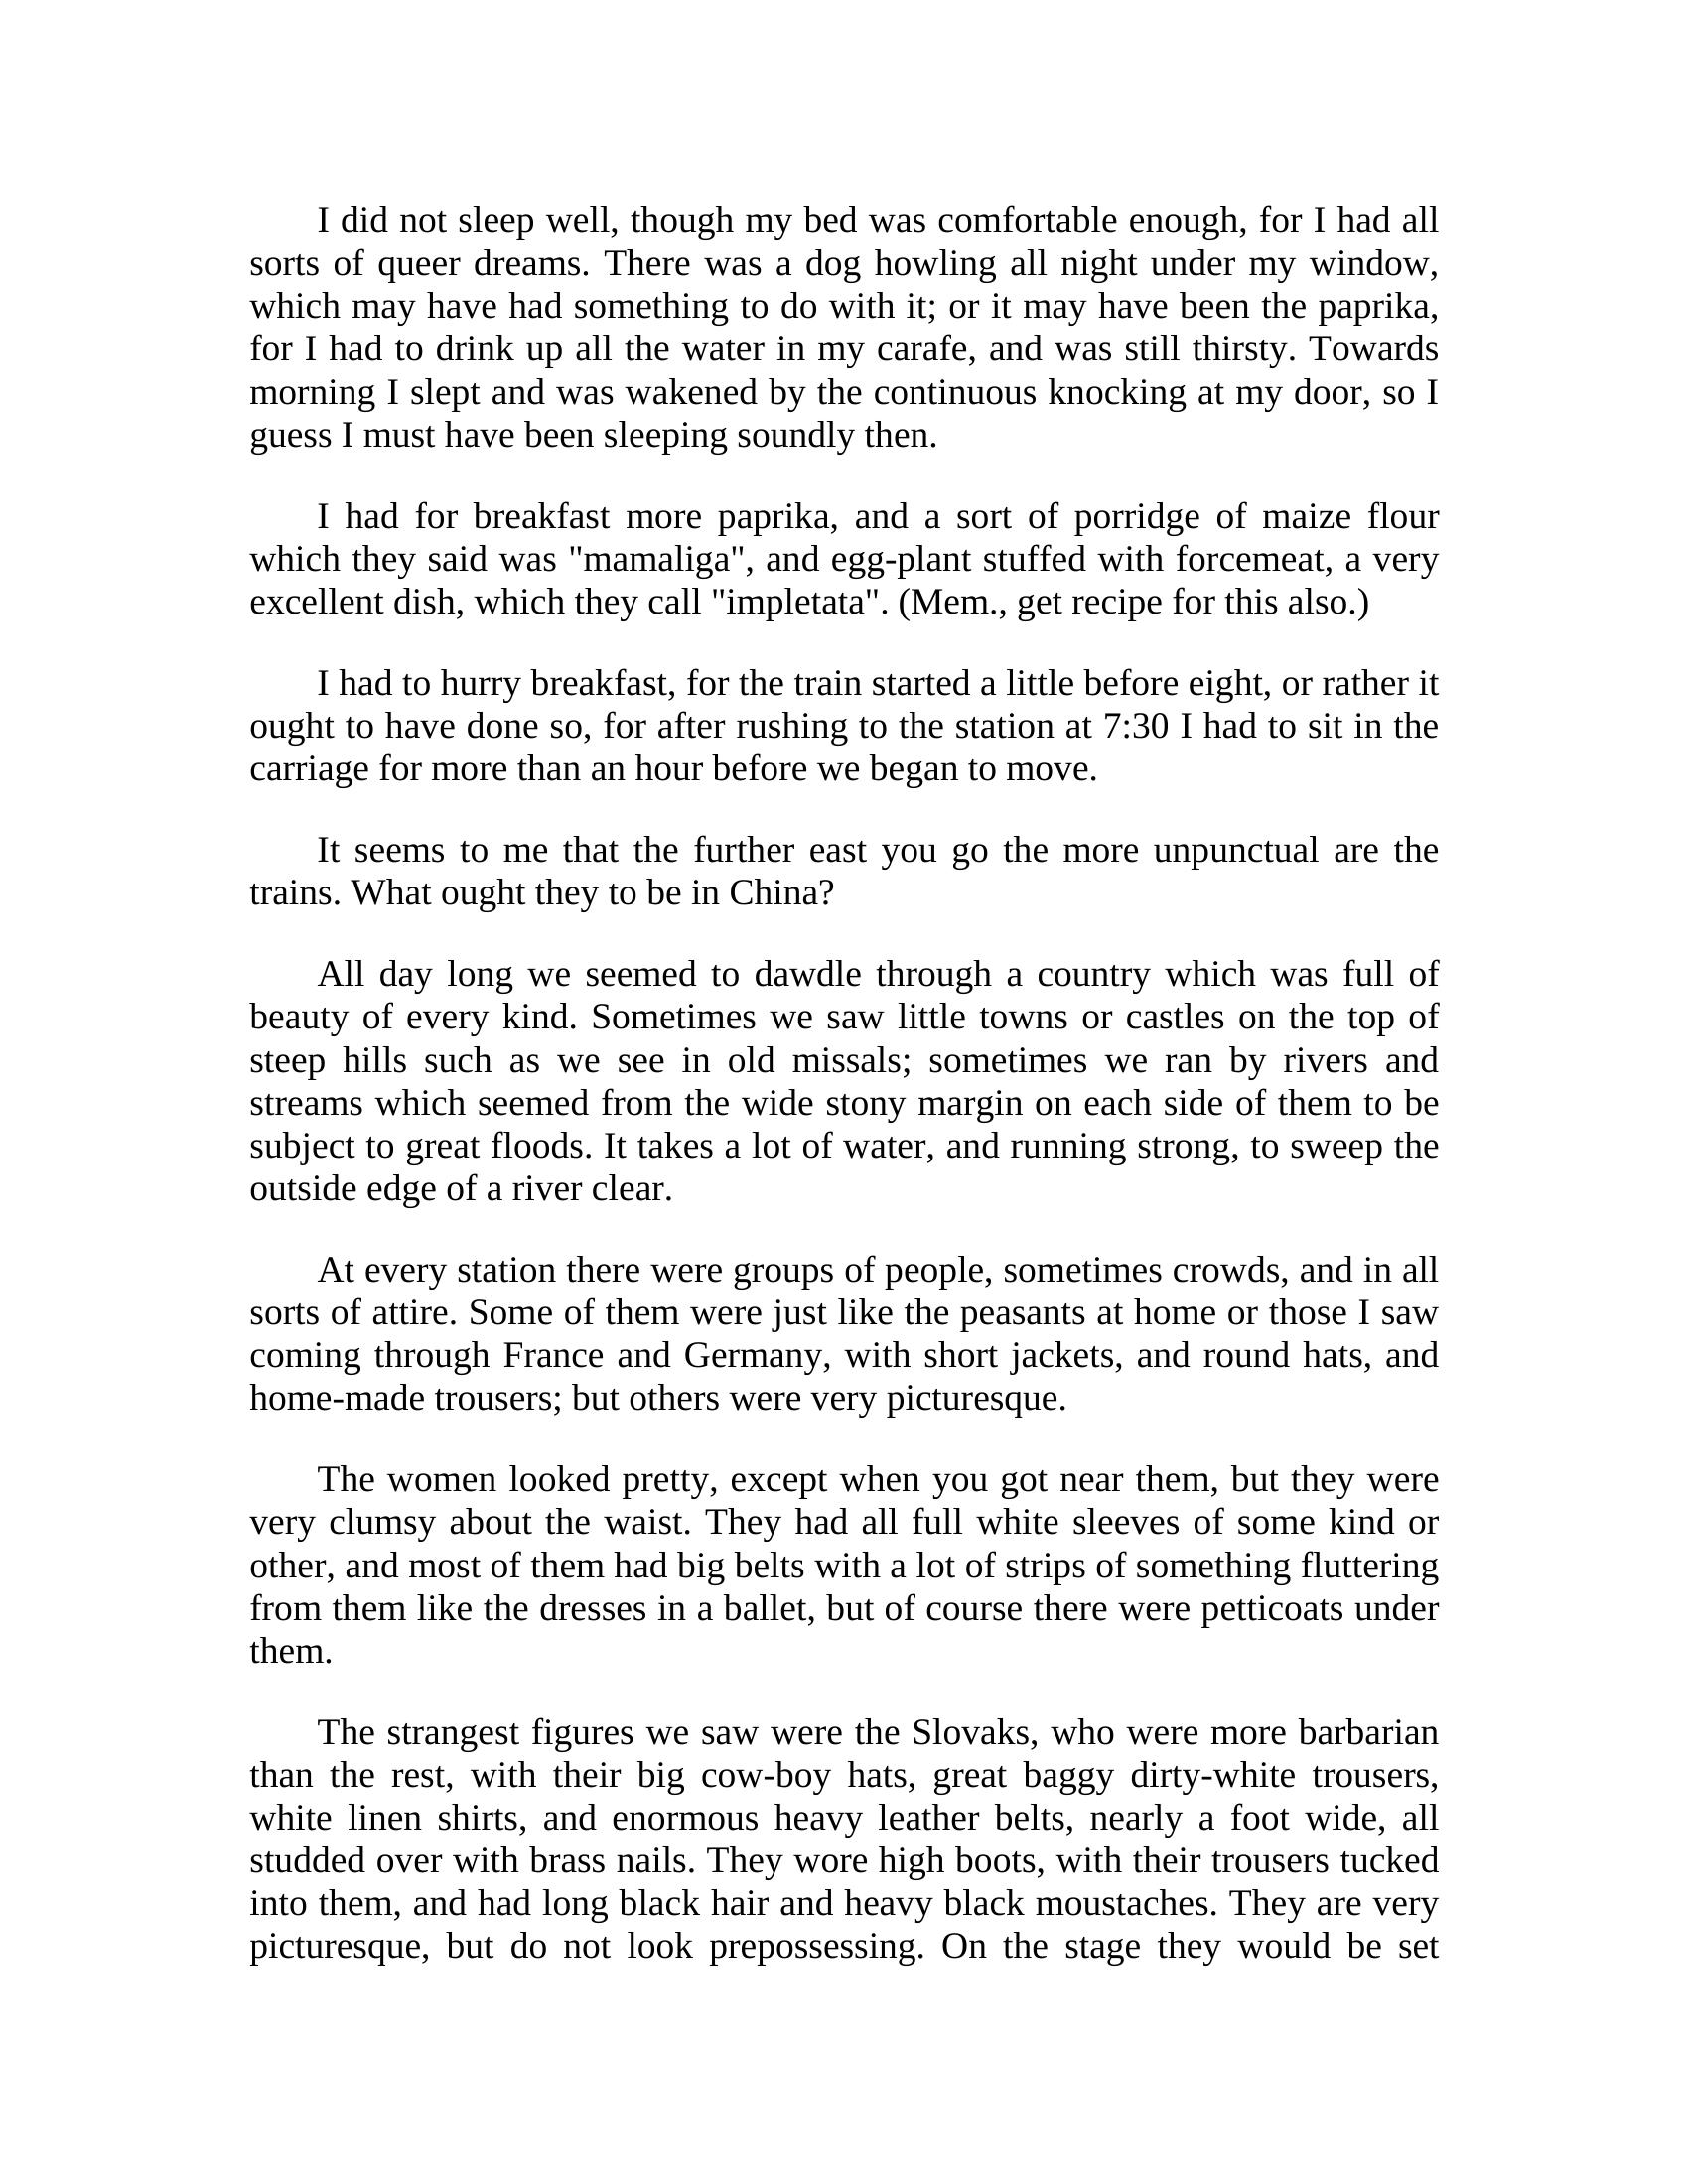

In [16]:
from IPython.display import Image, IFrame

# عرض الصورة
print("--- عرض الصورة ---")
Image(filename='/content/1.jpg') # تأكد من أن هذا هو المسار الصحيح لملفك

In [18]:
# عرض ملف PDF
print("--- عرض ملف PDF ---")
IFrame('/content/a.pdf', width=800, height=500) # تأكد من أن هذا هو المسار الصحيح لملفك

--- عرض ملف PDF ---


### عرض ملف pdf

عدد الصفحات: 1

--- الصفحة 1 ---


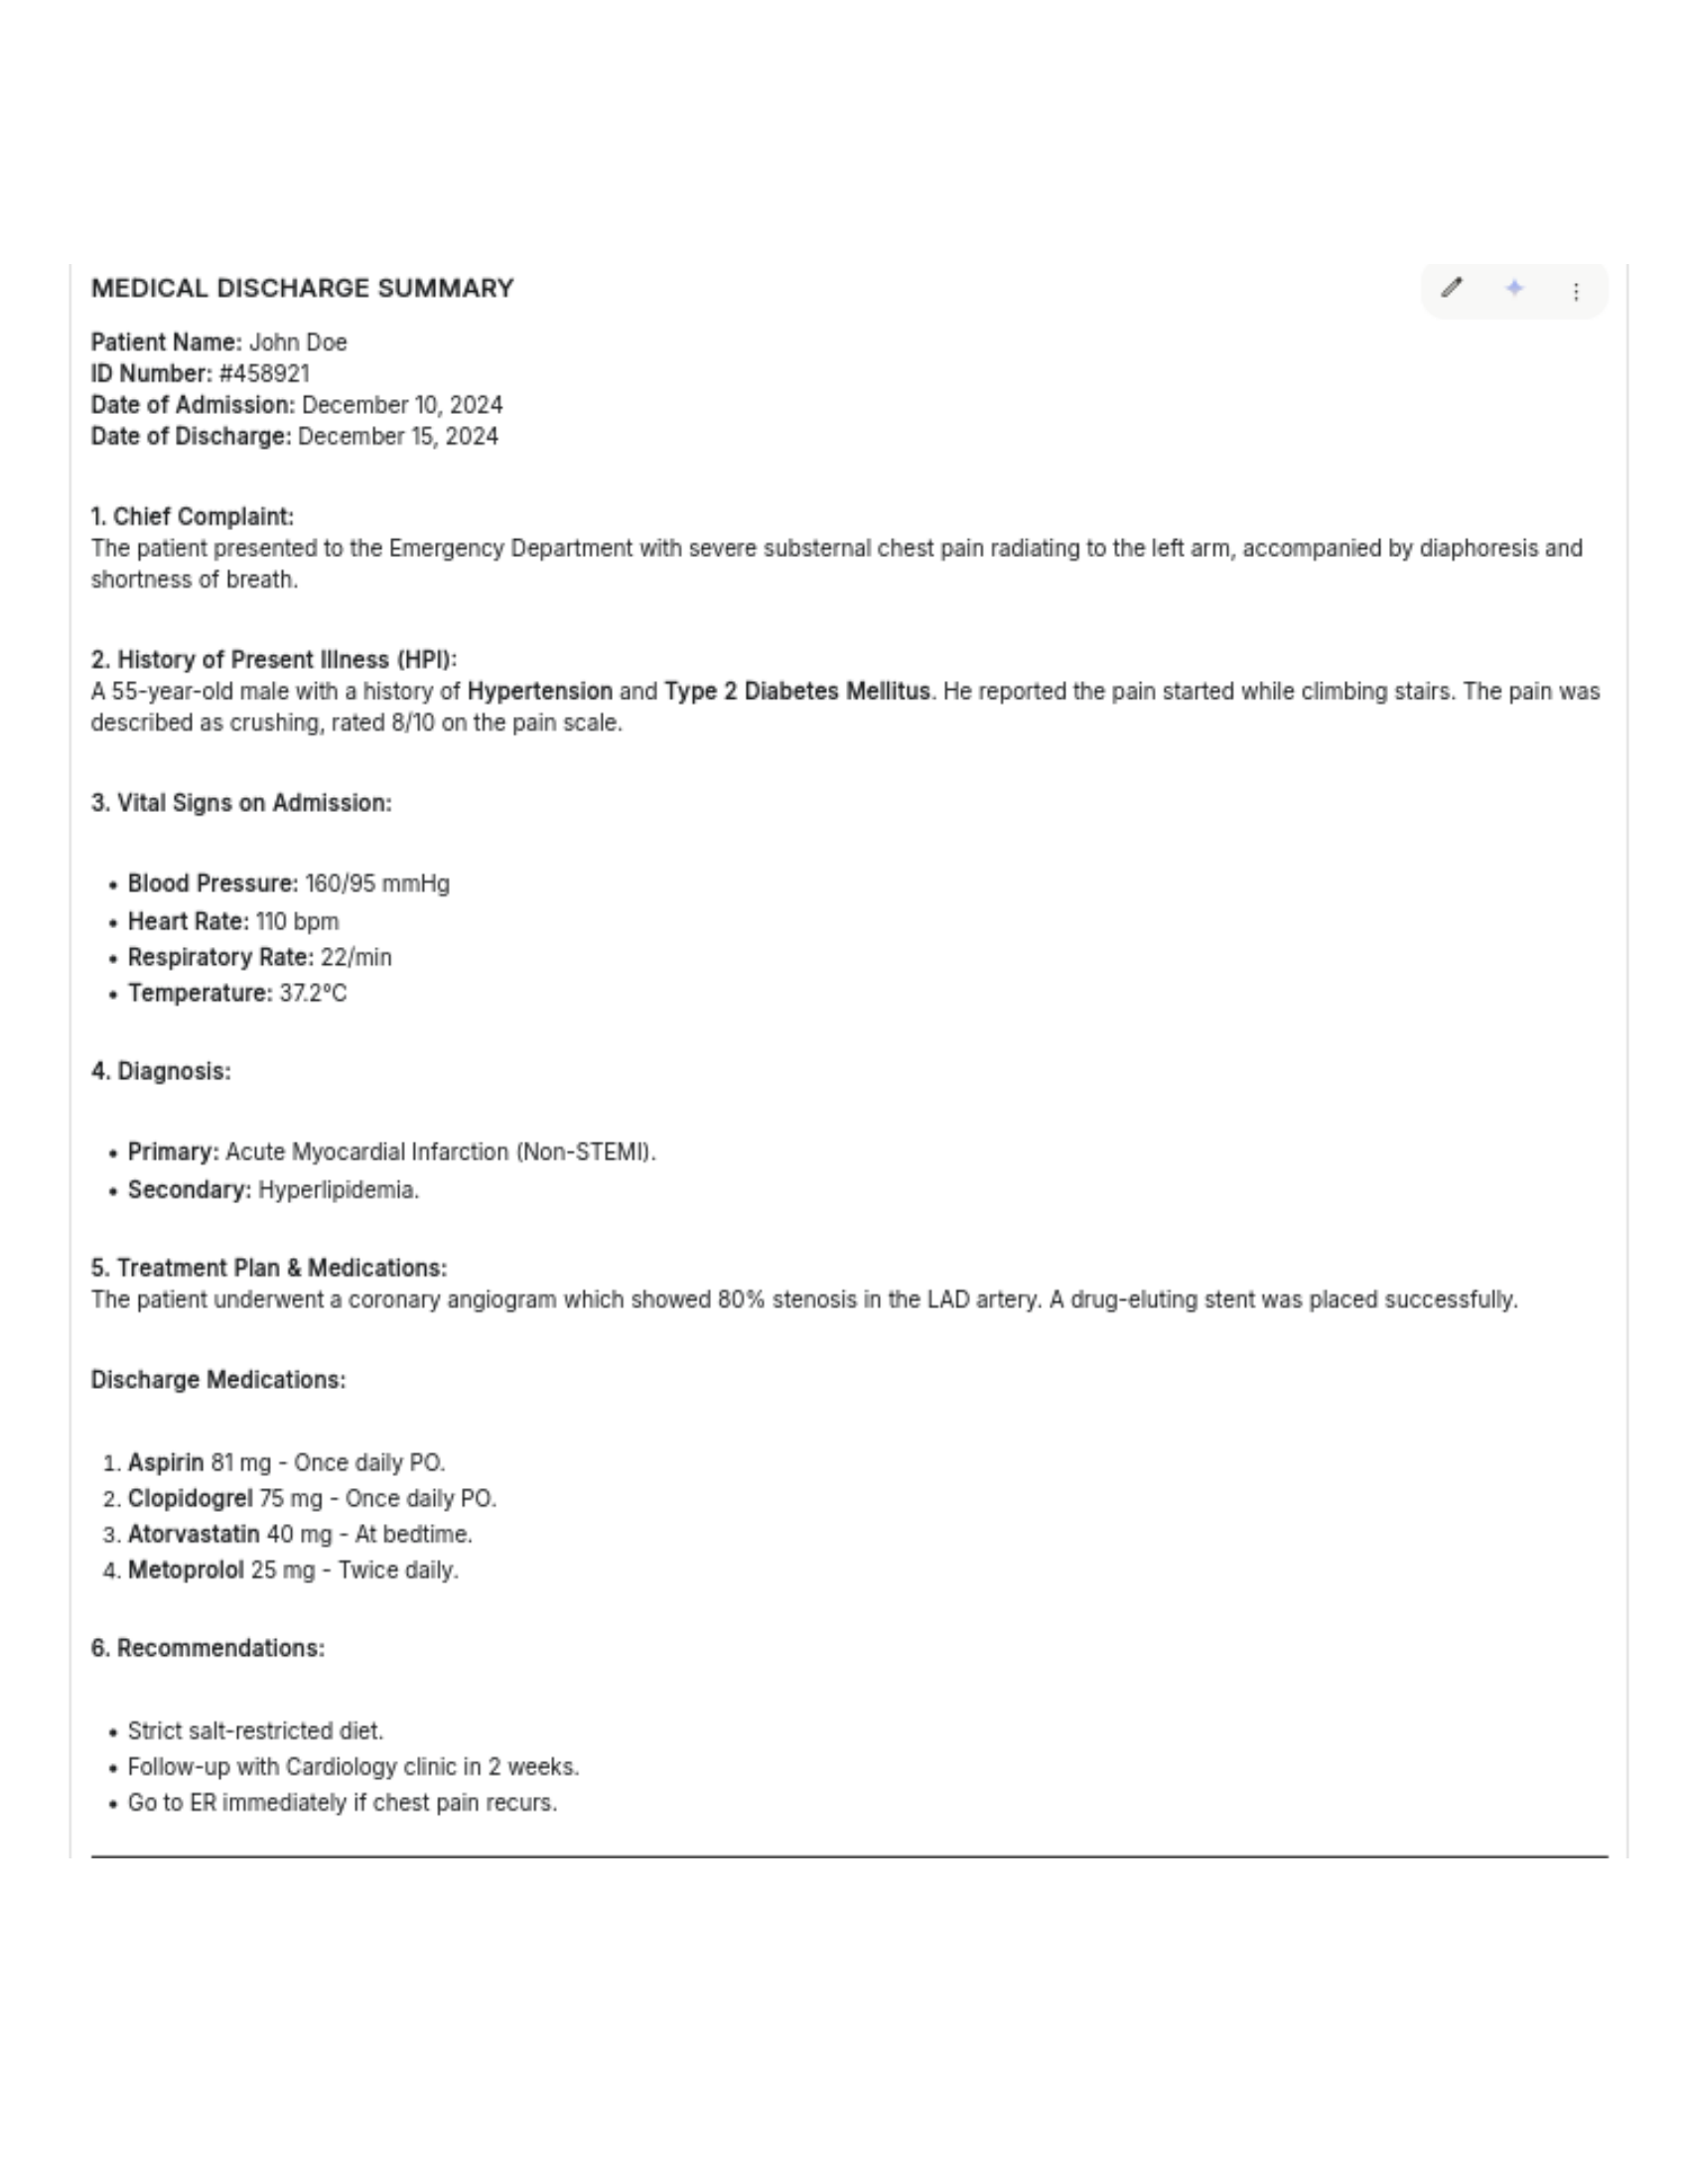

In [19]:
from pdf2image import convert_from_path
from IPython.display import display

# مسار الملف
pdf_path = '/content/a.pdf'  # تأكد من الاسم

# تحويل الصفحات
pages = convert_from_path(pdf_path)

print(f"عدد الصفحات: {len(pages)}\n")

# عرض كل صفحة
for i, page in enumerate(pages):
    print(f"--- الصفحة {i+1} ---")
    display(page) # هذه الدالة تعرض الصورة مباشرة
    print("\n")

عدد الصفحات: 1

--- الصفحة 1 ---


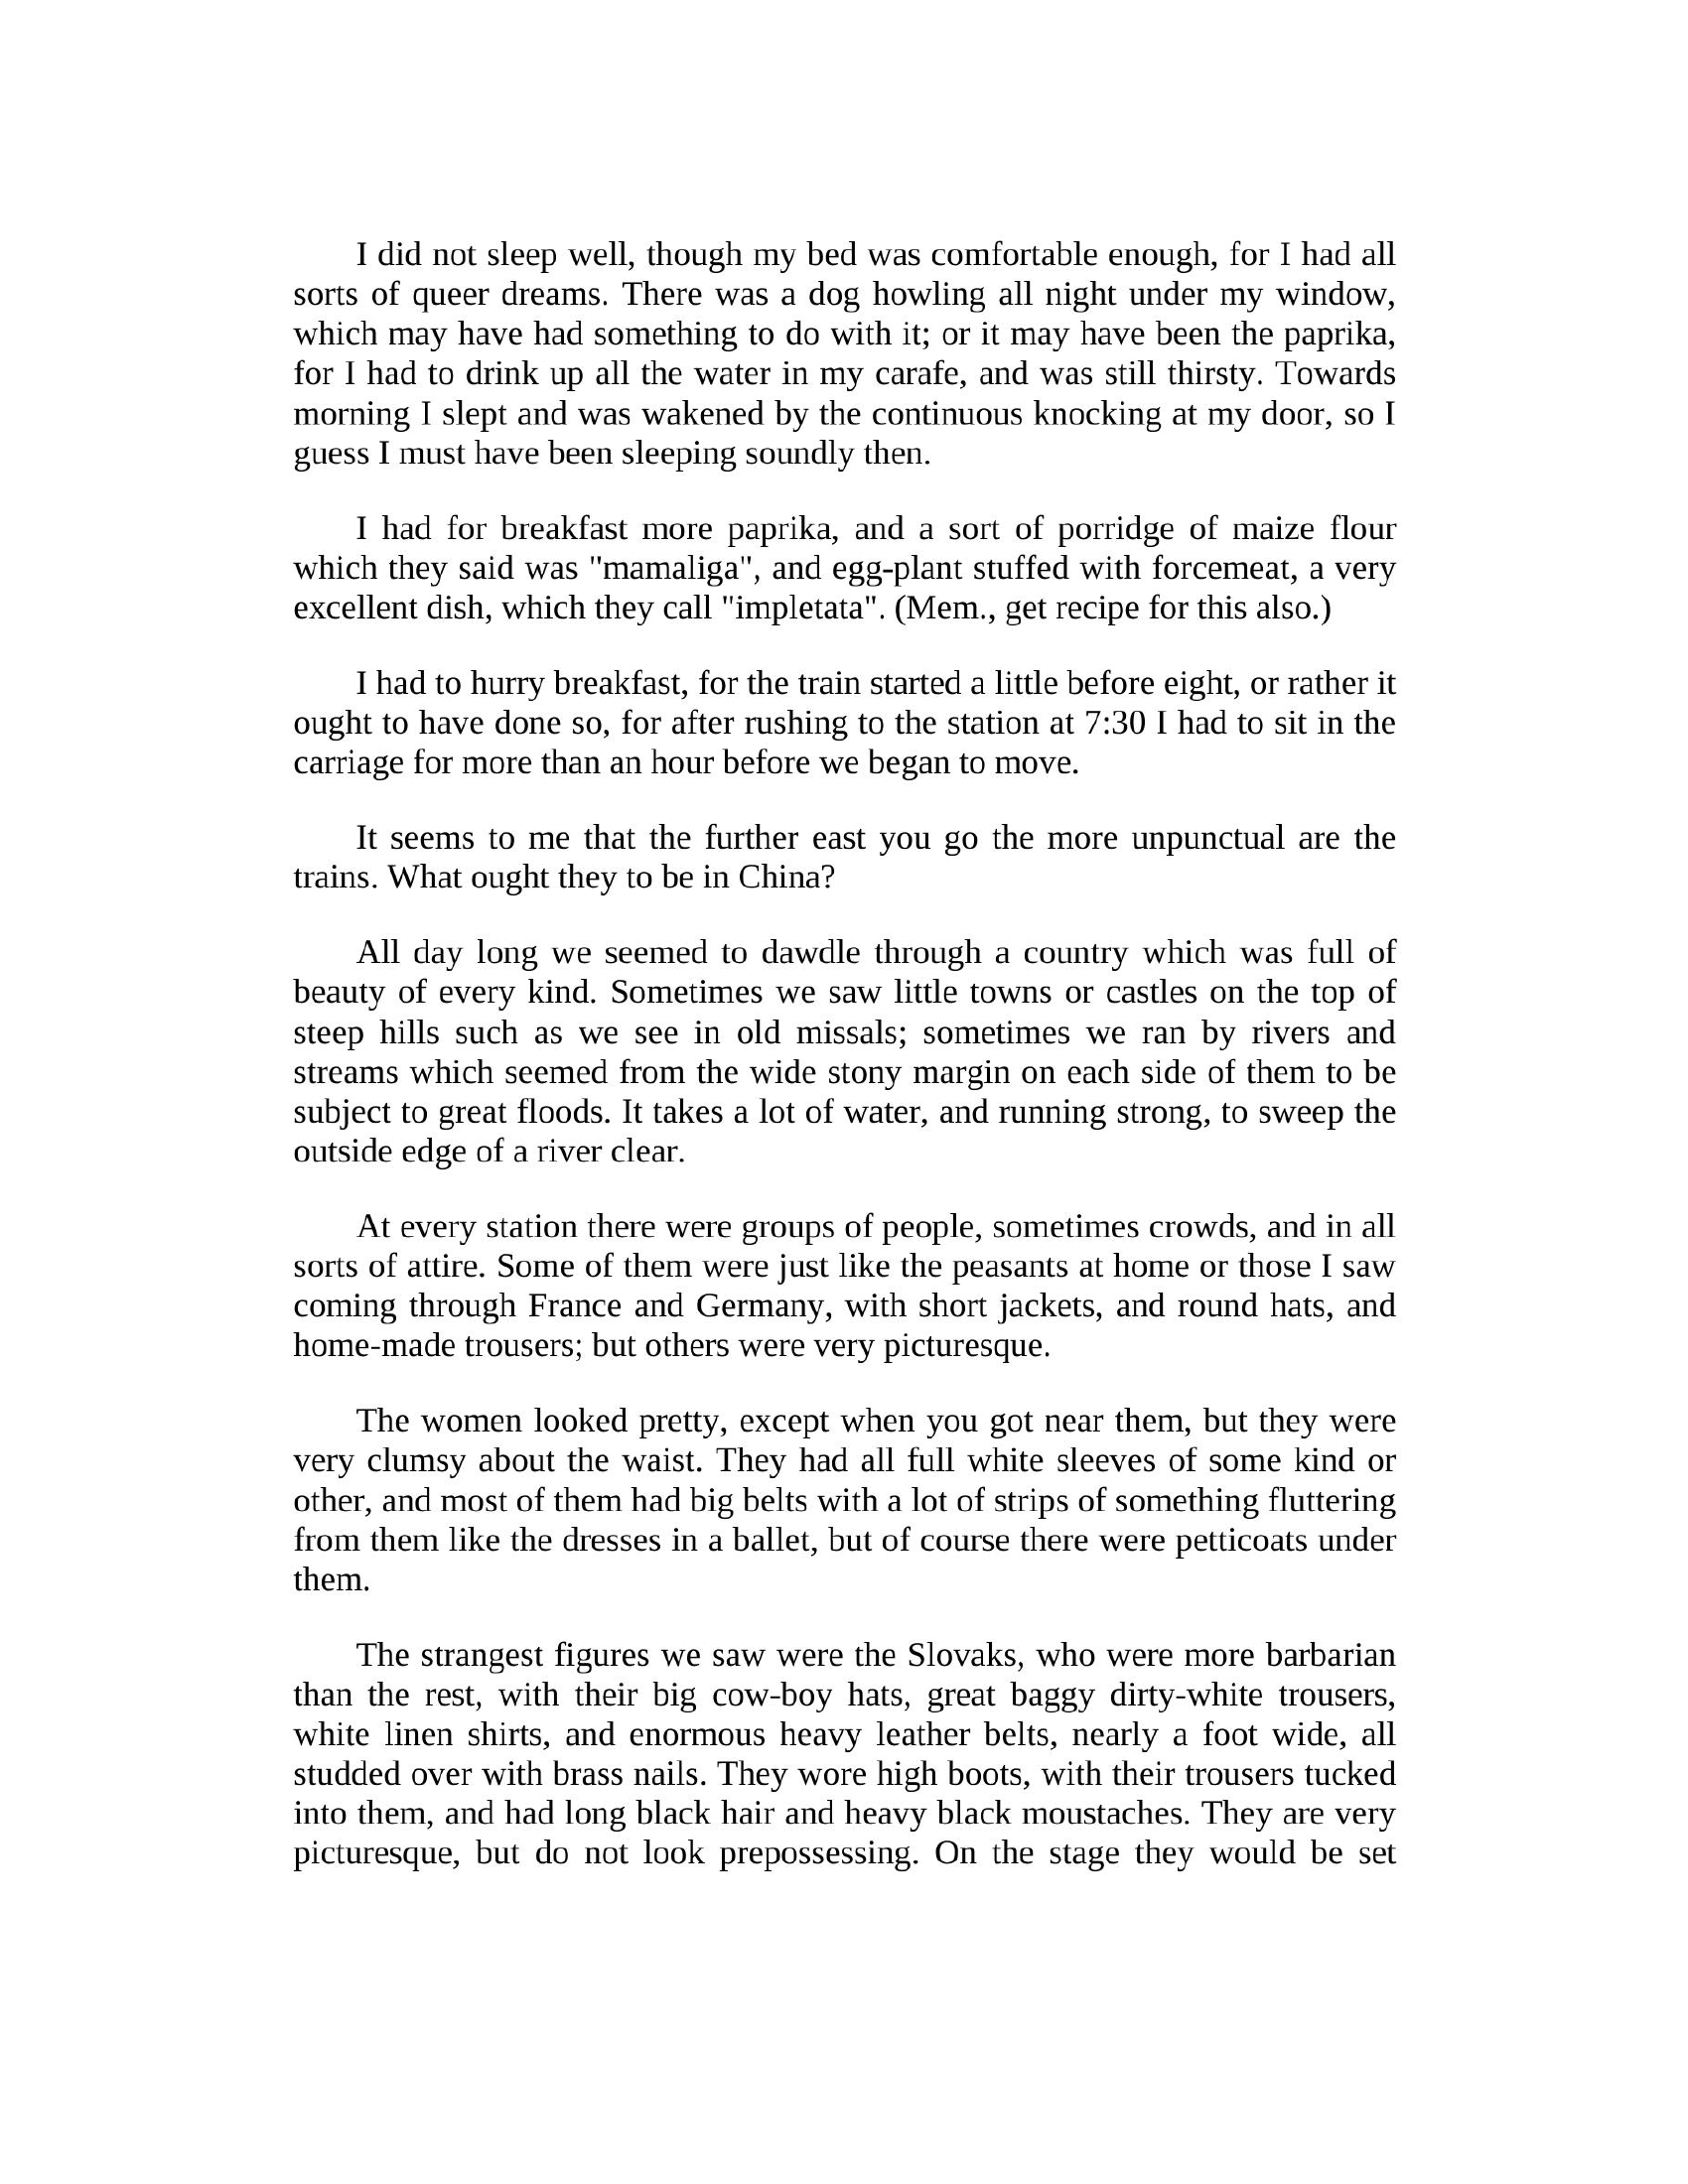

In [20]:
from pdf2image import convert_from_path
from IPython.display import display

# مسار الملف
pdf_path = '/content/aa.pdf'  # تأكد من الاسم

# تحويل الصفحات
pages = convert_from_path(pdf_path)

print(f"عدد الصفحات: {len(pages)}\n")

# عرض كل صفحة
for i, page in enumerate(pages):
    print(f"--- الصفحة {i+1} ---")
    display(page) # هذه الدالة تعرض الصورة مباشرة
    print("\n")

In [21]:
import os
import logging
import warnings
import numpy as np
from pdf2image import convert_from_path
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إعدادات الصمت (إخفاء الرسائل المزعجة)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('argostranslate.utils').setLevel(logging.CRITICAL)
logging.getLogger('ppocr').setLevel(logging.CRITICAL)

# 2. إعداد الـ OCR
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

# === ضع مسار ملف الـ PDF هنا ===
pdf_path = '/content/aa.pdf'  # غير هذا الاسم لاسم ملفك

print("جاري تحويل صفحات PDF إلى صور وقراءتها... (قد يستغرق وقتاً حسب عدد الصفحات)")

try:
    # 3. تحويل الـ PDF إلى صور
    # هذه الدالة تعيد قائمة تحتوي على صور الصفحات
    pages_images = convert_from_path(pdf_path)

    all_pdf_text = []

    # 4. المرور على كل صفحة
    for i, page_image in enumerate(pages_images):
        print(f"--> جاري معالجة الصفحة رقم {i+1}...")

        # PaddleOCR يحتاج الصورة بصيغة Numpy Array
        img_numpy = np.array(page_image)

        # استخراج النص
        results = ocr.predict(img_numpy)

        # تجميع النص من هذه الصفحة
        if results:
            for res in results:
                if res and 'rec_texts' in res:
                    all_pdf_text.extend(res['rec_texts'])

    # 5. التجميع النهائي والترجمة
    if all_pdf_text:
        full_text = " ".join(all_pdf_text)

        print("\n" + "="*40 + "\n")
        print("--- النص المستخرج من الـ PDF ---")
        # طباعة أول 500 حرف فقط لتوفير المساحة
        print(full_text[:500] + "...")
        print("\n" + "="*40 + "\n")

        print("--- جاري الترجمة... ---")

        # تقسيم النص وترجمته (كما فعلنا سابقاً)
        sentences = full_text.split('. ')
        translated_paragraphs = []

        for sentence in sentences:
            if len(sentence.strip()) > 0:
                text_to_translate = sentence + "."
                try:
                    trans = argostranslate.translate.translate(text_to_translate, "en", "ar")
                    translated_paragraphs.append(trans)
                except:
                    translated_paragraphs.append(sentence)

        final_arabic_text = " ".join(translated_paragraphs)

        print(final_arabic_text)

        # حفظ النتيجة في ملف
        with open('pdf_translation.txt', 'w', encoding='utf-8') as f:
            f.write(final_arabic_text)
        print("\nتم حفظ الترجمة في ملف pdf_translation.txt")

    else:
        print("لم يتم العثور على أي نصوص داخل ملف الـ PDF.")

except Exception as e:
    print(f"حدث خطأ: {e}")
    print("تأكد أن مسار الملف صحيح وأنك قمت بتثبيت poppler-utils")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


جاري تحويل صفحات PDF إلى صور وقراءتها... (قد يستغرق وقتاً حسب عدد الصفحات)
--> جاري معالجة الصفحة رقم 1...


--- النص المستخرج من الـ PDF ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour ...


--- جاري الترجمة... ---
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة

### عرض ملف pdf

In [23]:
import base64
from IPython.display import display, HTML

def show_pdf(file_path):
    # قراءة الملف وتحويله إلى صيغة Base64 ليفهمه المتصفح
    with open(file_path, "rb") as f:
        base64_pdf = base64.b64encode(f.read()).decode('utf-8')

    # كود HTML للعرض
    pdf_display = f'<iframe src="data:application/pdf;base64,{base64_pdf}" width="100%" height="800" type="application/pdf"></iframe>'

    # عرض النتيجة
    display(HTML(pdf_display))

# استدعاء الدالة
show_pdf('/content/a.pdf')

In [24]:
import os
import logging
import warnings
import numpy as np
from pdf2image import convert_from_path
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إعدادات الصمت (إخفاء الرسائل المزعجة)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('argostranslate.utils').setLevel(logging.CRITICAL)
logging.getLogger('ppocr').setLevel(logging.CRITICAL)

# 2. إعداد الـ OCR
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

# === ضع مسار ملف الـ PDF هنا ===
pdf_path = '/content/aa.pdf'  # غير هذا الاسم لاسم ملفك

print("جاري تحويل صفحات PDF إلى صور وقراءتها... (قد يستغرق وقتاً حسب عدد الصفحات)")

try:
    # 3. تحويل الـ PDF إلى صور
    # هذه الدالة تعيد قائمة تحتوي على صور الصفحات
    pages_images = convert_from_path(pdf_path)

    all_pdf_text = []

    # 4. المرور على كل صفحة
    for i, page_image in enumerate(pages_images):
        print(f"--> جاري معالجة الصفحة رقم {i+1}...")

        # PaddleOCR يحتاج الصورة بصيغة Numpy Array
        img_numpy = np.array(page_image)

        # استخراج النص
        results = ocr.predict(img_numpy)

        # تجميع النص من هذه الصفحة
        if results:
            for res in results:
                if res and 'rec_texts' in res:
                    all_pdf_text.extend(res['rec_texts'])

    # 5. التجميع النهائي والترجمة
    if all_pdf_text:
        full_text = " ".join(all_pdf_text)

        print("\n" + "="*40 + "\n")
        print("--- النص المستخرج من الـ PDF ---")
        # طباعة أول 500 حرف فقط لتوفير المساحة
        print(full_text[:500] + "...")
        print("\n" + "="*40 + "\n")

        print("--- جاري الترجمة... ---")

        # تقسيم النص وترجمته (كما فعلنا سابقاً)
        sentences = full_text.split('. ')
        translated_paragraphs = []

        for sentence in sentences:
            if len(sentence.strip()) > 0:
                text_to_translate = sentence + "."
                try:
                    trans = argostranslate.translate.translate(text_to_translate, "en", "ar")
                    translated_paragraphs.append(trans)
                except:
                    translated_paragraphs.append(sentence)

        final_arabic_text = " ".join(translated_paragraphs)

        print(final_arabic_text)

        # حفظ النتيجة في ملف
        with open('pdf_translation.txt', 'w', encoding='utf-8') as f:
            f.write(final_arabic_text)
        print("\nتم حفظ الترجمة في ملف pdf_translation.txt")

    else:
        print("لم يتم العثور على أي نصوص داخل ملف الـ PDF.")

except Exception as e:
    print(f"حدث خطأ: {e}")
    print("تأكد أن مسار الملف صحيح وأنك قمت بتثبيت poppler-utils")

Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


جاري تحويل صفحات PDF إلى صور وقراءتها... (قد يستغرق وقتاً حسب عدد الصفحات)
--> جاري معالجة الصفحة رقم 1...


--- النص المستخرج من الـ PDF ---
I did not sleep well, though my bed was comfortable enough, for I had all sorts of queer dreams. There was a dog howling all night under my window, which may have had something to do with it; or it may have been the paprika, for I had to drink up all the water in my carafe, and was still thirsty. Towards morning I slept and was wakened by the continuous knocking at my door, so I guess I must have been sleeping soundly then. I had for breakfast more paprika, and a sort of porridge of maize flour ...


--- جاري الترجمة... ---
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة

## لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام الكاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء يتطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك بسكويتات تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على المسرح سيجهزون

In [ ]:
/content/pdf_translation.txt
لم أنم جيداً، على الرغم من أن سريري كان مريحاً بما فيه الكفاية، لأن لدي كل أنواع الأحلام الغريبة. كان هناك كلب يرتجف طوال الليل تحت نافذتي والذي ربما كان له علاقة به أو ربما كان البوبريكا في الصباح نمت و استيقظت من استمرار طرق بابي لذا أعتقد أنني كنت نائماً جيداً لقد تناولت فطوراً أكثر من "الببريكا" و نوع من العصيدة من الذبابة التي قالوا أنها كانت "ماماليغالا" وزرعة بيض محشوة بـ "بوتمايت" طبق ممتاز جداً (Mem., get recipe for this also.) كان عليّ أن أسرع في الإفطار، لأن القطار بدأ قبل الثامنة بقليل، أو بالأحرى كان يجب أن يفعل ذلك، لأنه بعد أن أسرع إلى المحطة في السابعة والنصف كان عليّ أن أجلس في العربة لأكثر من ساعة قبل أن نبدأ بالتحرك. يبدو لي أن الشرق الأبعد الذي تذهب إليه هو القطارات ماذا يجب أن يكونوا في الصين؟ طوال اليوم بدا أننا نمر من خلال بلد مليء بالجمال من كل نوع في بعض الأحيان رأينا مدن أو قلعة صغيرة على قمة التلال العميقة كما نراها في الخرافات القديمة؛ وفي بعض الأحيان نركض على الأنهار والمجاري التي بدت من هامش المهارة الواسع على كل جانب من جانبها أن تتعرض لفيضانات كبيرة. يتطلب الكثير من الماء، ويركض بقوة، لمسح الحافة الخارجية من النهر. في كل محطة كان هناك مجموعات من الناس، وأحيانا الحشود، وفي جميع أنواع الملابس. وكان بعضها مثل الفلاحين في المنزل أو أولئك الذين رأيتهم يأتون من خلال فرنسا وألمانيا، مع سترات قصيرة، وقبعات مستديرة، وبنطال منزلي الصنع؛ ولكن البعض الآخر كان صورا جدا. النسوة بدت جميلة، ما عدا عندما اقتربت منهم، لكنّهم كانوا متشائمين جدا حول الخصر. كان لديهم كل الأكمام الكاملة من نوع ما أو آخر، ومعظمهم كان لديه أحزمة كبيرة مع الكثير من الشرائط من شيء يتطاير منهم مثل الفساتين في الباليه، ولكن بالطبع كان هناك بسكويتات تحتها. أغرب الأرقام التي رأيناها كانت السلوفاكيين، الذين كانوا أشرار من البقية، مع قبعات راعي البقر الكبيرة، السراويل المتسخة القميص الأبيض، والأحزمة البيضاء، والأحزمة الجلدية الثقيلة الهائلة، على نطاق قدم تقريبا، كانوا يرتدون أحذية عالية، مع السراويل الخاصة بهم عالقة في لهم، وكان لديهم شعر أسود طويل وشعر أسود ثقيل. إنها صور جداً، لكن لا تبدو مفترسة. على المسرح سيجهزون

In [ ]:
import os
import logging
import warnings
import numpy as np
from pdf2image import convert_from_path
from paddleocr import PaddleOCR
import argostranslate.translate

# 1. إعدادات النظام وإسكات الرسائل
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
logging.getLogger('argostranslate').setLevel(logging.CRITICAL)
logging.getLogger('ppocr').setLevel(logging.CRITICAL)

# 2. تشغيل الـ OCR
ocr = PaddleOCR(use_textline_orientation=True, lang='en')

# === ضع مسار ملف الـ PDF الطبي هنا ===
pdf_path = '/content/medical_report.pdf'

print("جاري تحليل التقرير الطبي...")

try:
    # 3. تحويل الصفحات لصور
    pages_images = convert_from_path(pdf_path)

    full_text_lines = []

    # 4. استخراج النص سطر بسطر للحفاظ على التنسيق
    for page_image in pages_images:
        img_numpy = np.array(page_image)
        results = ocr.predict(img_numpy)

        if results:
            for res in results:
                if res and 'rec_texts' in res:
                    # نضيف النصوص كما هي (قائمة) للحفاظ على الترتيب
                    full_text_lines.extend(res['rec_texts'])

    if full_text_lines:
        print("\n=== النص الأصلي (English) ===\n")
        # دمج الأسطر بفاصل سطر جديد ليبقى الشكل مرتباً
        english_text = "\n".join(full_text_lines)
        print(english_text)

        print("\n=== الترجمة العربية (Arabic) ===\n")

        # ترجمة سطر بسطر للحفاظ على شكل القائمة (List)
        for line in full_text_lines:
            # تجاهل الأسطر القصيرة جداً أو الأرقام فقط
            if len(line.strip()) > 2:
                try:
                    # ترجمة السطر
                    trans = argostranslate.translate.translate(line, "en", "ar")
                    print(f"- {trans}")
                except:
                    print(line)
            else:
                print(line)

    else:
        print("لم يتم العثور على نص.")

except Exception as e:
    print(f"حدث خطأ: {e}")

الحل الثاني: العودة إلى نسخة مستقرة (الأسهل والأضمن

In [ ]:
# 1. حذف النسخة الحالية
pip uninstall paddleocr -y
pip uninstall paddlepaddle -y

# 2. تثبيت نسخة مستقرة ومعروفة (متوافقة مع الكود القديم)
pip install paddleocr==2.7.3
pip install paddlepaddle

In [ ]:
from paddleocr import PaddleOCR

# سيعمل هذا الكود بسلاسة مع النسخة 2.7.3
ocr = PaddleOCR(use_angle_cls=True, lang='en')
img_path = '/content/1.jpg'
result = ocr.ocr(img_path, cls=True)

for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line[1][0])

In [ ]:
    print(res)



الخيار 2: العودة للنسخة القديمة (الحل الأفضل والأسهل) 🌟

بما أنك تتبع شرحاً (Tutorial) على موقع Medium، فذلك الشرح يستخدم النسخة القديمة المستقرة. النسخة الجديدة التي لديك حالياً غيرت طريقة كتابة الكود تماماً وستتعبك في استخراج النص لترجمته.

لحل المشكلة نهائياً وتشغيل كودك الأصلي، نفذ هذه الخطوات بالترتيب في Google Colab:

    احذف المكتبات الحالية (انسخ هذا وضعه في خلية جديدة وشغله):

code Bash


pip uninstall paddleocr paddlepaddle paddlepaddle-gpu -y



    ثبت النسخة المستقرة 2.7.3 (التي تعمل مع كل الشروحات):

code Bash


pip install paddleocr==2.7.3 paddlepaddle



    هام جداً: بعد التثبيت، اذهب للقائمة في الأعلى:
    Runtime -> Restart Session (أو Restart Runtime)
    (هذه الخطوة ضرورية ليتعرف Colab على النسخة القديمة).

    الآن شغل كودك الأصلي وسيعمل بدون مشاكل:

code Python


from paddleocr import PaddleOCR

# لاحظ: هنا نستخدم use_angle_cls وتعمل بامتياز في هذه النسخة
ocr = PaddleOCR(use_angle_cls=True, lang='en')

img_path = '/content/1.jpg' # تأكد من مسار صورتك

# الدالة القديمة ستعمل الآن
result = ocr.ocr(img_path, cls=True)

# استخراج النص للترجمة
for idx in range(len(result)):
    res = result[idx]
    if res is not None:
        for line in res:
            text = line[1][0]
            print(f"النص المستخرج: {text}")
            # هنا يمكنك وضع كود Argos Translate



27.1s
Use Arrow Up and Arrow Down to select a turn, Enter to jump to it, and Escape to return to the chat.
